In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# укажи свой путь и имя файла
file_path = "C:/Users/Артем/Desktop/Дома.xlsm"


In [4]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: C:\Users\Артем\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_excel(file_path, engine="openpyxl")

# посмотреть первые строки
print(df.head())

  shortname_region formalname_region shortname_city formalname_city  \
0             Респ            Адыгея              г        Адыгейск   
1             Респ            Адыгея              г        Адыгейск   
2             Респ            Адыгея              г        Адыгейск   
3             Респ            Адыгея              г        Адыгейск   
4             Респ            Адыгея              г        Адыгейск   

                                          address  built_year  \
0                Респ. Адыгея, г. Адыгейск, д. 66         NaN   
1    Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7         NaN   
2   Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54         NaN   
3  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388         NaN   
4  Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785      2008.0   

   exploitation_start_year project_type           house_type is_alarm  ...  \
0                      NaN          NaN                  NaN      Нет  ...   
1                      NaN

In [6]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [7]:
df.columns

Index(['shortname_region', 'formalname_region', 'shortname_city',
       'formalname_city', 'address', 'built_year', 'exploitation_start_year',
       'project_type', 'house_type', 'is_alarm', 'floor_count_max',
       'entrance_count', 'elevators_count', 'energy_efficiency', 'area_total',
       'area_residential', 'area_non_residential', 'foundation_type',
       'floor_type', 'wall_material', 'basement_area', 'chute_type',
       'chute_count', 'electrical_type', 'electrical_entries_count',
       'heating_type', 'hot_water_type', 'cold_water_type', 'sewerage_type',
       'sewerage_cesspools_volume', 'gas_type', 'ventilation_type',
       'firefighting_type', 'drainage_type', 'energy_efficiency_predict'],
      dtype='object')

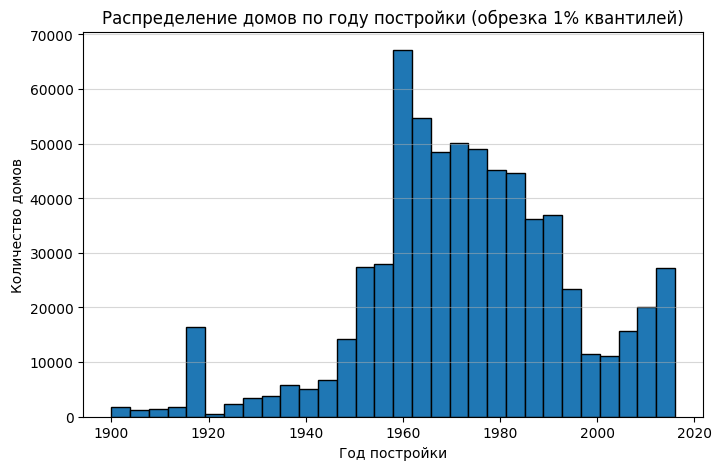

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["built_year"] >= low) & (df["built_year"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["built_year"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [9]:
df["built_year"] = pd.to_numeric(df["built_year"], errors="coerce")

avg_years = df.groupby("energy_efficiency")["built_year"].mean()
print(avg_years)

energy_efficiency
A      1986.439961
A+     2011.112540
A++    2003.127660
B      1994.390359
B+     2002.612018
B++    1977.093329
C      1991.621804
D      1971.334322
E      1969.762234
F      1963.611791
G      1968.026744
Name: built_year, dtype: float64


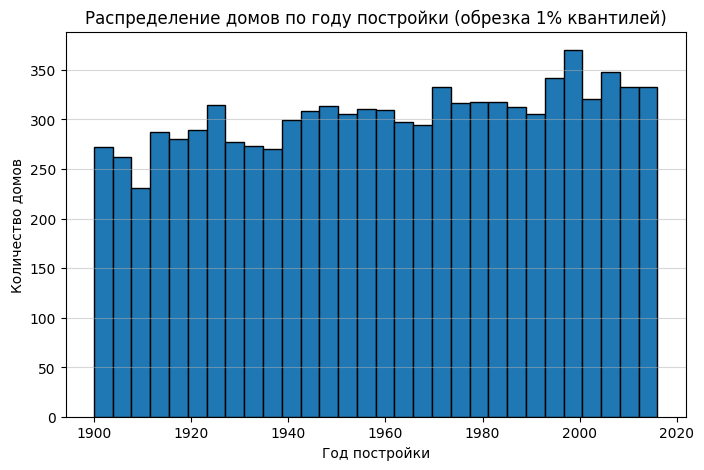

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# приводим built_year к числам
df["area_total"] = pd.to_numeric(df["area_total"], errors="coerce")

# считаем пороги
low = df["built_year"].quantile(0.01)
high = df["built_year"].quantile(0.99)

# фильтруем данные
df_filtered = df[(df["area_total"] >= low) & (df["area_total"] <= high)]

# строим гистограмму
plt.figure(figsize=(8,5))
plt.hist(df_filtered["area_total"].dropna(), bins=30, edgecolor="black")

plt.title("Распределение домов по году постройки (обрезка 1% квантилей)")
plt.xlabel("Год постройки")
plt.ylabel("Количество домов")
plt.grid(axis="y", alpha=0.5)

plt.show()


In [11]:
df.head()

,shortname_region,formalname_region,shortname_city,formalname_city,address,built_year,exploitation_start_year,project_type,house_type,is_alarm,...,heating_type,hot_water_type,cold_water_type,sewerage_type,sewerage_cesspools_volume,gas_type,ventilation_type,firefighting_type,drainage_type,energy_efficiency_predict
0,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, д. 66",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
1,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 7",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
2,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 54",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,Автономное,NaN,NaN,NaN,F
3,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 388",NaN,NaN,NaN,NaN,Нет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
4,Респ,Адыгея,г,Адыгейск,"Респ. Адыгея, г. Адыгейск, ул. 8 Марта, д. 785",2008.0,2000.0,1963,Многоквартирный дом,Нет,...,"Автономная котельная (крышная, встроенно-прист...",Закрытая с приготовлением горячей воды на ЦТП,Автономное,Отсутствует,198654.2,Отсутствует,Приточная вентиляция,Пожарные гидранты,Внутренние водостоки,B++


In [12]:
df_cut = df[['formalname_region', 'built_year', 'energy_efficiency', 'area_total']]

In [13]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
0,Адыгея,NaN,C,8.0
1,Адыгея,NaN,C,NaN
2,Адыгея,NaN,F,7890.0
3,Адыгея,NaN,C,NaN
4,Адыгея,2008.0,B++,76.7
...,...,...,...,...
1026337,Севастополь,1946.0,C,614.2
1026338,Севастополь,1950.0,C,348.1
1026339,Севастополь,1955.0,C,632.5
1026340,Севастополь,2018.0,A,2203.4


In [14]:
regions = [
    "Белгородская",
    "Брянская",
    "Владимирская",
    "Воронежская",
    "Москва",
    "Ивановская",
    "Калужская",
    "Костромская",
    "Курская",
    "Липецкая",
    "Московская",
    "Орловская",
    "Рязанская",
    "Смоленская",
    "Тамбовская",
    "Тверская",
    "Тульская",
    "Ярославская"
]

df_cut = df_cut[df_cut["formalname_region"].isin(regions)]

In [15]:
df_cut

,formalname_region,built_year,energy_efficiency,area_total
232197,Белгородская,1967.0,F,308.1
232198,Белгородская,NaN,F,1707.3
232199,Белгородская,1964.0,E,1354.4
232200,Белгородская,1963.0,E,1358.8
232201,Белгородская,1964.0,F,711.4
...,...,...,...,...
1014239,Москва,1997.0,E,14852.6
1014240,Москва,1998.0,E,14851.6
1014241,Москва,1995.0,E,7305.0
1014242,Москва,1995.0,E,7332.0


In [16]:
df_cut.isna().sum()

formalname_region        0
built_year           64239
energy_efficiency        0
area_total           24528
dtype: int64

In [17]:
df_cut_cleaned = df_cut.dropna()


In [18]:
coeffs = {
    "A++": 0.4,
    "A+": 0.5,
    "A": 0.6,
    "B++": 0.63,
    "B+": 0.66,
    "B": 0.7,
    "C": 0.85,
    "D": 1,
    "E": 1.25,
    "F": 1.5,
    "G": 1.75
}

# создаём новый столбец
df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


C:\Users\Артем\AppData\Local\Temp\ipykernel_18944\2022551181.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cut_cleaned["area_eff"] = df_cut_cleaned["area_total"] * df_cut_cleaned["energy_efficiency"].map(coeffs)


In [19]:
df_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_total,area_eff
232197,Белгородская,1967.0,F,308.1,462.15
232199,Белгородская,1964.0,E,1354.4,1693.00
232200,Белгородская,1963.0,E,1358.8,1698.50
232201,Белгородская,1964.0,F,711.4,1067.10
232202,Белгородская,1965.0,E,1364.0,1705.00
...,...,...,...,...,...
1014239,Москва,1997.0,E,14852.6,18565.75
1014240,Москва,1998.0,E,14851.6,18564.50
1014241,Москва,1995.0,E,7305.0,9131.25
1014242,Москва,1995.0,E,7332.0,9165.00


In [20]:
df_filtered_cut_cleaned = (
    df_cut_cleaned
    .groupby(["formalname_region", "built_year", "energy_efficiency"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)


In [21]:
df_filtered_cut_cleaned

,formalname_region,built_year,energy_efficiency,area_eff
0,Белгородская,1800.0,D,158.700
1,Белгородская,1856.0,D,273.600
2,Белгородская,1864.0,E,319.375
3,Белгородская,1870.0,D,245.300
4,Белгородская,1871.0,D,88.500
...,...,...,...,...
9195,Ярославская,2018.0,B,3072.230
9196,Ярославская,2018.0,C,8663.370
9197,Ярославская,2019.0,B++,6035.211
9198,Ярославская,2019.0,C,9375.160


In [22]:
import pandas as pd

# группировка и сумма по срезу
df_grouped = (
    df_filtered_cut_cleaned
    .groupby(["formalname_region", "built_year"], as_index=False)
    .agg({"area_eff": "sum"})
    .sort_values(["formalname_region", "built_year"])
)

# накопительная сумма по региону (и при желании — по energy_efficiency отдельно)
df_grouped["area_eff_cumsum"] = (
    df_grouped
    .groupby(["formalname_region"])["area_eff"]
    .cumsum()
)

df_grouped


,formalname_region,built_year,area_eff,area_eff_cumsum
0,Белгородская,1800.0,158.700,1.587000e+02
1,Белгородская,1856.0,273.600,4.323000e+02
2,Белгородская,1864.0,319.375,7.516750e+02
3,Белгородская,1870.0,245.300,9.969750e+02
4,Белгородская,1871.0,88.500,1.085475e+03
...,...,...,...,...
2306,Ярославская,2016.0,265881.681,2.658298e+07
2307,Ярославская,2017.0,234482.290,2.681747e+07
2308,Ярославская,2018.0,11735.600,2.682920e+07
2309,Ярославская,2019.0,15410.371,2.684461e+07


In [23]:
df_grouped[(df_grouped['formalname_region'] == 'Москва') & (df_grouped['built_year'] == 1999)] 

,formalname_region,built_year,area_eff,area_eff_cumsum
1237,Москва,1999.0,3666273.91,2.320383e+08


In [24]:
df_grouped.head()

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Белгородская,1800.0,158.700,158.700
1,Белгородская,1856.0,273.600,432.300
2,Белгородская,1864.0,319.375,751.675
3,Белгородская,1870.0,245.300,996.975
4,Белгородская,1871.0,88.500,1085.475


In [25]:
import pandas as pd

data_climate = {
    "Год": list(range(1960, 2061)),
    "Зима": [
        -8.36, -8.03, -8.49, -8.54, -8.10, -8.22, -8.07, -8.82, -8.09, -8.71,
        -8.67, -8.63, -8.19, -8.39, -8.48, -8.40, -8.51, -8.49, -8.65, -8.09,
        -8.14, -8.37, -8.17, -8.67, -9.28, -7.68, -7.85, -7.84, -7.85, -7.83,
        -6.79, -7.98, -7.50, -8.22, -7.95, -7.78, -7.19, -7.28, -7.81, -7.38,
        -6.96, -7.16, -6.88, -6.89, -7.23, -6.88, -6.45, -7.06, -6.08, -6.60,
        -6.70, -6.91, -7.23, -6.08, -6.10, -6.71, -5.91, -5.68, -6.24, -6.06,
        -5.68, -6.43, -4.98, -6.11, -6.45, -5.31, -6.05, -5.09, -5.04, -5.35,
        -5.70, -5.29, -5.06, -4.96, -5.44, -5.04, -4.87, -5.28, -4.96, -5.19,
        -4.13, -4.39, -4.79, -5.08, -4.96, -4.83, -5.78, -4.43, -3.91, -4.73,
        -3.97, -4.61, -4.97, -3.96, -4.23, -4.68, -4.22, -4.24, -4.61, -3.85,
        -4.08
    ]
}

df_cfo_climate = pd.DataFrame(data_climate)
df_cfo_climate

,Год,Зима
0,1960,-8.36
1,1961,-8.03
2,1962,-8.49
3,1963,-8.54
4,1964,-8.10
...,...,...
96,2056,-4.22
97,2057,-4.24
98,2058,-4.61
99,2059,-3.85


In [26]:

data_region_heat = {
    "Белгородская область": [
        3272.1, 3326.7, 2679.4, 3632, 3464.8, 3493.4, 3402.6, 3476.3, 3429.0, 3568.6,
        3636.7, 3764.1, 3632.4, 3367.0, 3376.9, 3211.1, 3295.9, 3183.3, 3343, 2848.89,
        2810.21, 3068.85, 3018.6, 2862.6, 2695.9
    ],
    "Брянская область": [
        2005.8, 2192, 2312.3, 2396.1, 2339.1, 2366.5, 2406.5, 2209.5, 2167.4, 2211.5,
        2219.3, 2273.9, 2335.2, 2056.4, 2086.0, 2242.3, 2239.2, 2260.5, 2309.4, 2261.06,
        2235.72, 2392.37, 2503.4, 2402.5, 2451.0
    ],
    "Владимирская область": [
        4513.3, 4512.7, 4644.4, 4536.9, 4771.4, 4312.3, 5047.5, 5285, 4684.1, 4737.2,
        4750.7, 4917.4, 4510.2, 4413.2, 4217.0, 4147.2, 4298.0, 4115.2, 4058.3, 3973.52,
        3929.16, 4283.85, 4309.4, 3900.8, 4001.8
    ],
    "Воронежская область": [
        3569.8, 3779, 3987.4, 4034.2, 4287.3, 4008.9, 4334.9, 4154, 4244.3, 4578.3,
        4388.0, 5056.5, 4693.7, 4768.1, 4960.0, 4949.9, 5020.2, 5228.7, 5436.4, 5369.79,
        5278.77, 5589.17, 5495.8, 5381.6, 5287.8
    ],
    "Ивановская область": [
        3742.5, 2694.3, 2612.5, 2746.8, 3006.3, 2846.3, 2902.0, 3313.1, 3189.9, 3271.3,
        3005.0, 3983.5, 3175.3, 3284.5, 2654.9, 2708.8, 2974.6, 2908.4, 2932, 2937.47,
        2789.31, 2976.55, 2928.6, 2831.3, 2815.8
    ],
    "Калужская область": [
        2731.1, 2793.4, 2812.5, 2918.5, 2977.2, 3039.6, 3199.5, 3138.4, 3120.4, 3223.5,
        3315.1, 3145.8, 3228.5, 2961.2, 2858.0, 2673.3, 2803.8, 2646.1, 2670.2, 2510.75,
        2395.54, 2638.29, 2624.8, 2449.4, 2424.0
    ],
    "Костромская область": [
        1983, 2483.7, 2297.3, 2244.3, 2410.3, 2620.7, 2121.8, 2339.9, 2072.9, 2060.0,
        1988.3, 1852.1, 1885.8, 1881.7, 1803.4, 1694.1, 1710.1, 1698.6, 1698.8, 1599.4,
        1535.01, 1730.11, 1676.2, 1513.7, 1537.8
    ],
    "Курская область": [
        2625, 2435.9, 2602.3, 2500.8, 1234.3, 1312.4, 2633.8, 2575.3, 2583.3, 2554.2,
        2746.2, 2673.1, 2354, 2335.8, 2270.4, 2286.9, 2326.2, 2368.8, 2504.3, 2432.74,
        2347.26, 2439.3, 2465.7, 2432.4, 2342.0
    ],
    "Липецкая область": [
        2429.3, 2419.2, 2680.8, 2708.6, 2856.5, 2967.9, 3597.6, 3404, 3259.7, 3366.6,
        3259.1, 3247.6, 3034.4, 2706.0, 2736.2, 2644.1, 2875.9, 2647.6, 2736.4, 2720.27,
        2570.66, 2697.41, 2590.2, 2575.5, 2531.8
    ],
    "Московская область": [
        24750.9, 26739.1, 27819.4, 27955.3, 28850.4, 28888.9, 31094.2, 30337.2, 29188.3, 32640.6,
        33519.7, 33344.2, 32953.4, 32816.2, 33312.9, 31579.5, 34859.8, 34787, 34882.1, 35760.56,
        34994.24, 38796.31, 39518.5, 39192.6, 40675.0
    ],
    "Орловская область": [
        1667, 1709.9, 1661.6, 1778, 1892.6, 1759.9, 1866.2, 1854.4, 1860.5, 1859.1,
        1876.4, 1860.4, 1890.2, 1869.1, 1711.4, 1831.9, 1766.8, 1755.1, 1794.7, 1564.28,
        1538.3, 1574.06, 1531.5, 1956.6, 1933.3
    ],
    "Рязанская область": [
        2929.5, 3016, 3141.2, 3155.1, 3343.1, 3531.6, 3494.1, 3210.9, 3161.4, 3242.0,
        3015.5, 2980.7, 2899.2, 2875.0, 2945.6, 2930.6, 2911.7, 2894.8, 2847.4, 2823.97,
        2753.06, 2860.09, 2914.9, 2676.5, 2552.7
    ],
    "Смоленская область": [
        3114.8, 3198.6, 3172.7, 3101.1, 3043.1, 2900.2, 2832.5, 2857, 2909.9, 2981.4,
        3015.8, 2814.1, 2777.8, 2728.8, 2542.7, 2428, 2494.4, 2487.4, 2485.4, 2430.59,
        2392.04, 2468.12, 2419.8, 2366.2, 2339.8
    ],
    "Тамбовская область": [
        2063.1, 2057.6, 2004.5, 2107, 2083.4, 1951.8, 1991.2, 2288.7, 2741.0, 2811.7,
        1602.5, 1738.0, 1672.5, 1813.5, 1680.4, 1524.1, 1595.0, 1592.3, 1728.2, 1667.66,
        1575.07, 1695.76, 1697.0, 1641.6, 1619.4
    ],
    "Тверская область": [
        4261.2, 4512.3, 4367.5, 4367.5, 4558.7, 4583.4, 4678.4, 4748.4, 4686.4, 4720.2,
        4769.0, 4438.5, 4568.9, 4566.2, 4371.5, 4219.4, 4328.3, 4324.5, 4432.7, 4295.14,
        4241.23, 4573.33, 4485.9, 4214.0, 4299.8
    ],
    "Тульская область": [
        4655, 4806.7, 4772.6, 4778.3, 4618.2, 4558.6, 5040.8, 4726.7, 4666.8, 4691.5,
        4590.3, 4416.4, 4333.3, 4290.1, 4306.5, 3993.7, 4371.4, 4182.3, 4175.6, 4135.26,
        4144.35, 4293.92, 4270.9, 4192.5, 4149.2
    ],
    "Ярославская область": [
        5370.5, 5799.9, 5947.3, 6071.5, 6239.4, 6068.1, 6203.8, 6270, 5867.8, 6010.1,
        6236.0, 5784.7, 5813.8, 5750.0, 5560.6, 5501.1, 5569.9, 5476.2, 5325.2, 5234.42,
        5059.73, 5564.62, 5474.0, 5126.4, 5079.4
    ],
    "г.Москва": [
        53531.5, 55917.4, 56062, 57868.4, 56513.8, 58011.4, 58233.8, 55130.4, 52074.7, 54407.1,
        55909.7, 52774.0, 54664.9, 54190.6, 52517.5, 49900.4, 52748.9, 50891, 53068.5, 49872.3,
        48633.92, 55894.0, 53945.9, 51091.4, 52277.0
    ]
}

years = list(range(2000, 2025))  # 2000–2024
df_region_heat = pd.DataFrame(data_region_heat, index=years)

df_region_heat.T

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Белгородская область,3272.1,3326.7,2679.4,3632.0,3464.8,3493.4,3402.6,3476.3,3429.0,3568.6,...,3211.1,3295.9,3183.3,3343.0,2848.89,2810.21,3068.85,3018.6,2862.6,2695.9
Брянская область,2005.8,2192.0,2312.3,2396.1,2339.1,2366.5,2406.5,2209.5,2167.4,2211.5,...,2242.3,2239.2,2260.5,2309.4,2261.06,2235.72,2392.37,2503.4,2402.5,2451.0
Владимирская область,4513.3,4512.7,4644.4,4536.9,4771.4,4312.3,5047.5,5285.0,4684.1,4737.2,...,4147.2,4298.0,4115.2,4058.3,3973.52,3929.16,4283.85,4309.4,3900.8,4001.8
Воронежская область,3569.8,3779.0,3987.4,4034.2,4287.3,4008.9,4334.9,4154.0,4244.3,4578.3,...,4949.9,5020.2,5228.7,5436.4,5369.79,5278.77,5589.17,5495.8,5381.6,5287.8
Ивановская область,3742.5,2694.3,2612.5,2746.8,3006.3,2846.3,2902.0,3313.1,3189.9,3271.3,...,2708.8,2974.6,2908.4,2932.0,2937.47,2789.31,2976.55,2928.6,2831.3,2815.8
Калужская область,2731.1,2793.4,2812.5,2918.5,2977.2,3039.6,3199.5,3138.4,3120.4,3223.5,...,2673.3,2803.8,2646.1,2670.2,2510.75,2395.54,2638.29,2624.8,2449.4,2424.0
Костромская область,1983.0,2483.7,2297.3,2244.3,2410.3,2620.7,2121.8,2339.9,2072.9,2060.0,...,1694.1,1710.1,1698.6,1698.8,1599.40,1535.01,1730.11,1676.2,1513.7,1537.8
Курская область,2625.0,2435.9,2602.3,2500.8,1234.3,1312.4,2633.8,2575.3,2583.3,2554.2,...,2286.9,2326.2,2368.8,2504.3,2432.74,2347.26,2439.30,2465.7,2432.4,2342.0
Липецкая область,2429.3,2419.2,2680.8,2708.6,2856.5,2967.9,3597.6,3404.0,3259.7,3366.6,...,2644.1,2875.9,2647.6,2736.4,2720.27,2570.66,2697.41,2590.2,2575.5,2531.8
Московская область,24750.9,26739.1,27819.4,27955.3,28850.4,28888.9,31094.2,30337.2,29188.3,32640.6,...,31579.5,34859.8,34787.0,34882.1,35760.56,34994.24,38796.31,39518.5,39192.6,40675.0


In [27]:
df_grouped

,formalname_region,built_year,area_eff,area_eff_cumsum
0,Белгородская,1800.0,158.700,1.587000e+02
1,Белгородская,1856.0,273.600,4.323000e+02
2,Белгородская,1864.0,319.375,7.516750e+02
3,Белгородская,1870.0,245.300,9.969750e+02
4,Белгородская,1871.0,88.500,1.085475e+03
...,...,...,...,...
2306,Ярославская,2016.0,265881.681,2.658298e+07
2307,Ярославская,2017.0,234482.290,2.681747e+07
2308,Ярославская,2018.0,11735.600,2.682920e+07
2309,Ярославская,2019.0,15410.371,2.684461e+07


In [28]:
df_merged = df_grouped.merge(
    df_cfo_climate.rename(columns={"Год": "built_year", "Зима": "climate_winter"}),
    on="built_year",
    how="left"
)

In [29]:
df_merged

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter
0,Белгородская,1800.0,158.700,1.587000e+02,NaN
1,Белгородская,1856.0,273.600,4.323000e+02,NaN
2,Белгородская,1864.0,319.375,7.516750e+02,NaN
3,Белгородская,1870.0,245.300,9.969750e+02,NaN
4,Белгородская,1871.0,88.500,1.085475e+03,NaN
...,...,...,...,...,...
2306,Ярославская,2016.0,265881.681,2.658298e+07,-5.91
2307,Ярославская,2017.0,234482.290,2.681747e+07,-5.68
2308,Ярославская,2018.0,11735.600,2.682920e+07,-6.24
2309,Ярославская,2019.0,15410.371,2.684461e+07,-6.06


In [30]:
# функция для очистки названий
def clean_region_name(name: str) -> str:
    name = name.replace(" область", "")  # убираем слово "область"
    if name == "г.Москва":
        return "Москва"
    return name

# применяем к df_region_heat
df_heat_long = (
    df_region_heat
    .reset_index(names="built_year")
    .melt(id_vars="built_year", var_name="formalname_region", value_name="heat")
)

df_heat_long["formalname_region"] = df_heat_long["formalname_region"].apply(clean_region_name)

# то же самое для df_merged
df_merged["formalname_region"] = df_merged["formalname_region"].apply(clean_region_name)

# теперь мерж
df_final = df_merged.merge(
    df_heat_long,
    on=["formalname_region", "built_year"],
    how="left"
)

df_final


,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Белгородская,1800.0,158.700,1.587000e+02,NaN,NaN
1,Белгородская,1856.0,273.600,4.323000e+02,NaN,NaN
2,Белгородская,1864.0,319.375,7.516750e+02,NaN,NaN
3,Белгородская,1870.0,245.300,9.969750e+02,NaN,NaN
4,Белгородская,1871.0,88.500,1.085475e+03,NaN,NaN
...,...,...,...,...,...,...
2306,Ярославская,2016.0,265881.681,2.658298e+07,-5.91,5569.90
2307,Ярославская,2017.0,234482.290,2.681747e+07,-5.68,5476.20
2308,Ярославская,2018.0,11735.600,2.682920e+07,-6.24,5325.20
2309,Ярославская,2019.0,15410.371,2.684461e+07,-6.06,5234.42


In [31]:
df_final[(df_final['formalname_region'] == 'Москва') & (df_final['built_year'] > 1998)].sort_values(by='built_year')

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
1237,Москва,1999.0,3.666274e+06,2.320383e+08,-7.38,NaN
1238,Москва,2000.0,4.255718e+06,2.362940e+08,-6.96,53531.50
1239,Москва,2001.0,4.478680e+06,2.407727e+08,-7.16,55917.40
1240,Москва,2002.0,4.549043e+06,2.453217e+08,-6.88,56062.00
1241,Москва,2003.0,4.452279e+06,2.497740e+08,-6.89,57868.40
1242,Москва,2004.0,4.331204e+06,2.541052e+08,-7.23,56513.80
1243,Москва,2005.0,3.925546e+06,2.580307e+08,-6.88,58011.40
1244,Москва,2006.0,5.487133e+06,2.635179e+08,-6.45,58233.80
1245,Москва,2007.0,3.769333e+06,2.672872e+08,-7.06,55130.40
1246,Москва,2008.0,4.677567e+06,2.719648e+08,-6.08,52074.70


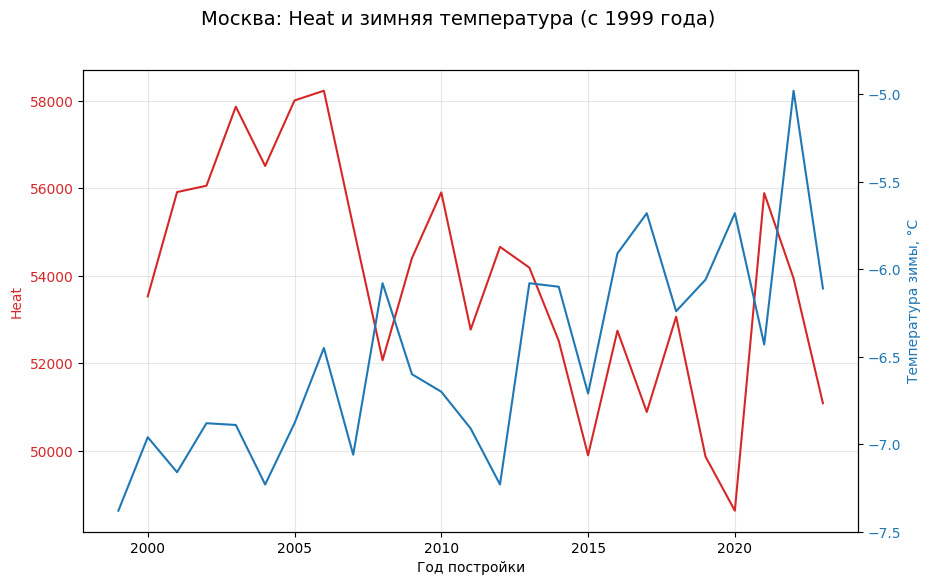

In [32]:
import matplotlib.pyplot as plt

# фильтруем Москву и годы начиная с 1999
df_moscow = df_final[
    (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1999)
]

fig, ax1 = plt.subplots(figsize=(10,6))

# первая ось: heat
ax1.plot(df_moscow["built_year"], df_moscow["heat"], color="tab:red", label="Heat")
ax1.set_xlabel("Год постройки")
ax1.set_ylabel("Heat", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# вторая ось: температура
ax2 = ax1.twinx()
ax2.plot(df_moscow["built_year"], df_moscow["climate_winter"], color="tab:blue", label="Температура (зима)")
ax2.set_ylabel("Температура зимы, °C", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# заголовок
fig.suptitle("Москва: Heat и зимняя температура (с 1999 года)", fontsize=14)

ax1.grid(alpha=0.3)
plt.show()


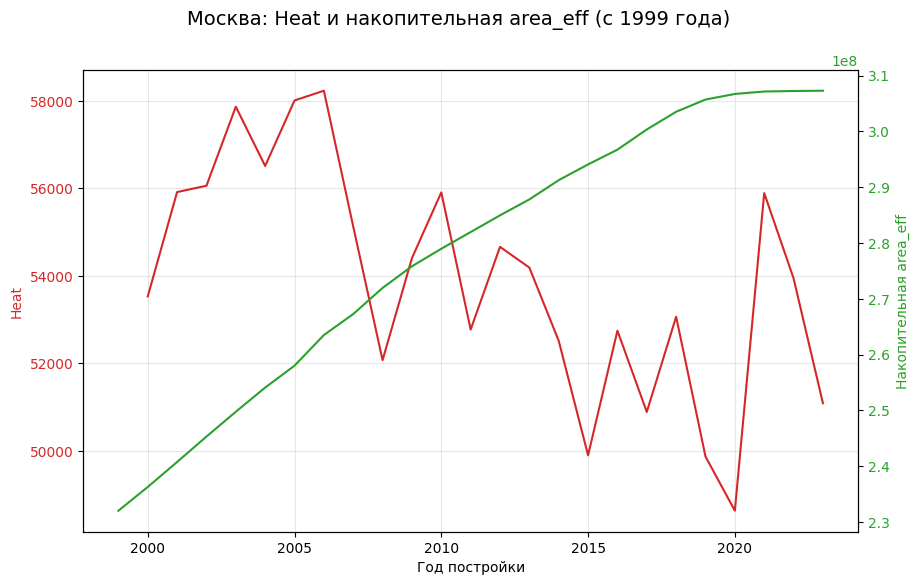

In [33]:
import matplotlib.pyplot as plt

# фильтруем Москву с 1999 года
df_moscow = df_final[
    (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1999)
]

fig, ax1 = plt.subplots(figsize=(10,6))

# первая ось: heat
ax1.plot(df_moscow["built_year"], df_moscow["heat"], color="tab:red", label="Heat")
ax1.set_xlabel("Год постройки")
ax1.set_ylabel("Heat", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")

# вторая ось: area_eff_cumsum
ax2 = ax1.twinx()
ax2.plot(df_moscow["built_year"], df_moscow["area_eff_cumsum"], color="tab:green", label="Area_eff_cumsum")
ax2.set_ylabel("Накопительная area_eff", color="tab:green")
ax2.tick_params(axis="y", labelcolor="tab:green")

# заголовок
fig.suptitle("Москва: Heat и накопительная area_eff (с 1999 года)", fontsize=14)

ax1.grid(alpha=0.3)
plt.show()


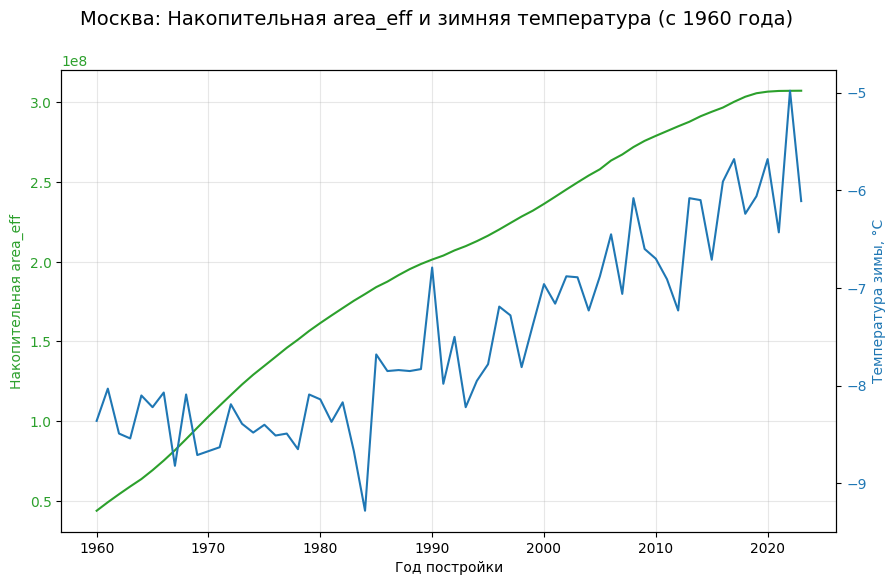

In [34]:
import matplotlib.pyplot as plt

# фильтруем Москву с 1999 года
df_moscow = df_final[
    (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1960)
]

fig, ax1 = plt.subplots(figsize=(10,6))

# первая ось: area_eff_cumsum
ax1.plot(df_moscow["built_year"], df_moscow["area_eff_cumsum"],
         color="tab:green", label="Area_eff_cumsum")
ax1.set_xlabel("Год постройки")
ax1.set_ylabel("Накопительная area_eff", color="tab:green")
ax1.tick_params(axis="y", labelcolor="tab:green")

# вторая ось: климат
ax2 = ax1.twinx()
ax2.plot(df_moscow["built_year"], df_moscow["climate_winter"],
         color="tab:blue", label="Температура (зима)")
ax2.set_ylabel("Температура зимы, °C", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

# заголовок
fig.suptitle("Москва: Накопительная area_eff и зимняя температура (с 1960 года)", fontsize=14)

ax1.grid(alpha=0.3)
plt.show()


In [35]:
df_final

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
0,Белгородская,1800.0,158.700,1.587000e+02,NaN,NaN
1,Белгородская,1856.0,273.600,4.323000e+02,NaN,NaN
2,Белгородская,1864.0,319.375,7.516750e+02,NaN,NaN
3,Белгородская,1870.0,245.300,9.969750e+02,NaN,NaN
4,Белгородская,1871.0,88.500,1.085475e+03,NaN,NaN
...,...,...,...,...,...,...
2306,Ярославская,2016.0,265881.681,2.658298e+07,-5.91,5569.90
2307,Ярославская,2017.0,234482.290,2.681747e+07,-5.68,5476.20
2308,Ярославская,2018.0,11735.600,2.682920e+07,-6.24,5325.20
2309,Ярославская,2019.0,15410.371,2.684461e+07,-6.06,5234.42


In [36]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# фильтруем данные с 2000 года
df_norm = df_final[df_final["built_year"] >= 2000].copy()

# выбираем только нужные столбцы
cols_to_scale = ["area_eff_cumsum", "climate_winter"]

scaler = MinMaxScaler()
df_norm[cols_to_scale] = scaler.fit_transform(df_norm[cols_to_scale])

print(df_norm[["built_year", "formalname_region", "area_eff_cumsum", "climate_winter"]].head())


     built_year formalname_region  area_eff_cumsum  climate_winter
106      2000.0      Белгородская         0.031235        0.118943
107      2001.0      Белгородская         0.032298        0.030837
108      2002.0      Белгородская         0.033619        0.154185
109      2003.0      Белгородская         0.034802        0.149780
110      2004.0      Белгородская         0.036239        0.000000


In [37]:
df_norm

,formalname_region,built_year,area_eff,area_eff_cumsum,climate_winter,heat
106,Белгородская,2000.0,366384.4362,0.031235,0.118943,3272.10
107,Белгородская,2001.0,316479.4755,0.032298,0.030837,3326.70
108,Белгородская,2002.0,393531.6730,0.033619,0.154185,2679.40
109,Белгородская,2003.0,352282.2104,0.034802,0.149780,3632.00
110,Белгородская,2004.0,428221.9477,0.036239,0.000000,3464.80
...,...,...,...,...,...,...
2306,Ярославская,2016.0,265881.6810,0.057532,0.581498,5569.90
2307,Ярославская,2017.0,234482.2900,0.058320,0.682819,5476.20
2308,Ярославская,2018.0,11735.6000,0.058359,0.436123,5325.20
2309,Ярославская,2019.0,15410.3710,0.058411,0.515419,5234.42


Intercept: 7114.12152553278
Coef area_eff_cumsum: 4.154586956839045e-06
Coef climate_winter: -56.512474900403554


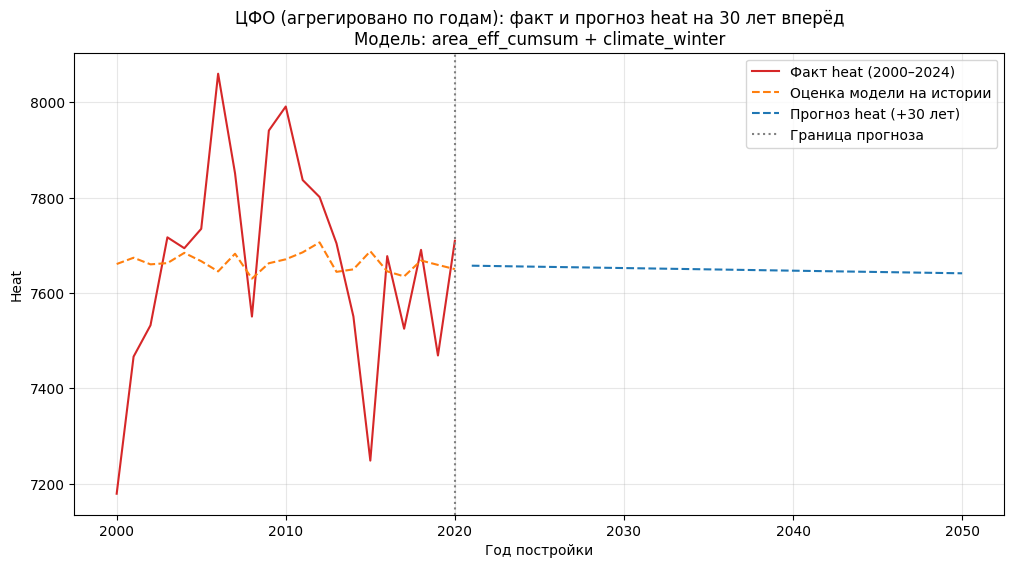

    built_year         heat  area_eff_cumsum  climate_winter    heat_pred  \
11      2011.0  7836.944444     4.347067e+07       -6.910000  7685.225395   
12      2012.0  7801.305556     4.413831e+07       -7.230000  7706.083175   
13      2013.0  7704.077778     4.490591e+07       -6.080000  7644.282871   
14      2014.0  7550.661111     4.588999e+07       -6.100000  7649.501571   
15      2015.0  7248.133333     4.673647e+07       -6.710000  7687.490944   
16      2016.0  7677.227778     4.745462e+07       -5.910000  7645.264578   
17      2017.0  7524.877778     4.805587e+07       -5.680000  7634.764693   
18      2018.0  7690.477778     4.845238e+07       -6.240000  7668.058996   
19      2019.0  7468.781667     4.867774e+07       -6.060000  7658.823016   
20      2020.0  7709.602500     5.172491e+07       -5.680000  7650.007999   
21      2021.0  7657.184138     5.074919e+07       -5.878714          NaN   
22      2022.0  7656.633847     5.144330e+07       -5.817948          NaN   

In [38]:
#ЦФО: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1) фильтр по годам и агрегация
# df_moscow = df_final[
#     (df_final["formalname_region"] == "Москва") & (df_final["built_year"] >= 1999)
# ]

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)

# 2) интерполяция пропусков
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
    .interpolate(method="linear")
)

# 3) обучение регрессии
X = df_yearly[["area_eff_cumsum", "climate_winter"]]
y = df_yearly["heat"]

reg = LinearRegression()
reg.fit(X, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum:", reg.coef_[0])
print("Coef climate_winter:", reg.coef_[1])

# 4) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейная экстраполяция признаков
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

# 5) прогноз и история
df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

df_all = pd.concat(
    [
        df_yearly.assign(type="Факт"),
        future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
    ],
    ignore_index=True
)

# 6) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ЦФО (агрегировано по годам): факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 7) таблица
print(df_all.tail(40))  # последние 40 лет (факт + прогноз)


Базовая регрессия:
Intercept: 7114.12152553278
Coef area_eff_cumsum: 4.154586956839045e-06
Coef climate_winter: -56.512474900403554
R2 базовой модели: 0.007327208511011318


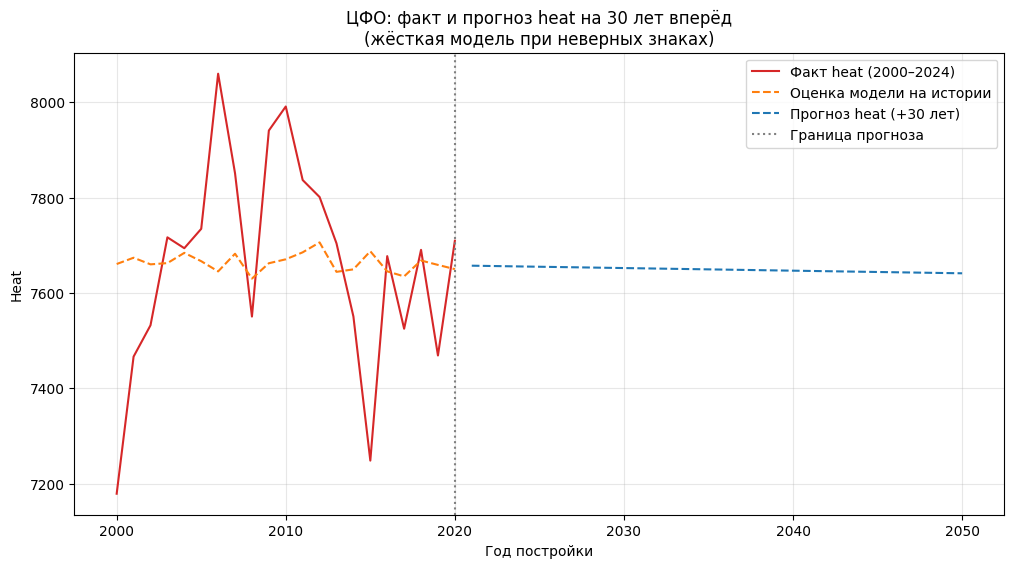

    built_year         heat    heat_pred     type
11      2011.0  7836.944444  7685.225395     Факт
12      2012.0  7801.305556  7706.083175     Факт
13      2013.0  7704.077778  7644.282871     Факт
14      2014.0  7550.661111  7649.501571     Факт
15      2015.0  7248.133333  7687.490944     Факт
16      2016.0  7677.227778  7645.264578     Факт
17      2017.0  7524.877778  7634.764693     Факт
18      2018.0  7690.477778  7668.058996     Факт
19      2019.0  7468.781667  7658.823016     Факт
20      2020.0  7709.602500  7650.007999     Факт
21      2021.0  7657.184138          NaN  Прогноз
22      2022.0  7656.633847          NaN  Прогноз
23      2023.0  7656.083556          NaN  Прогноз
24      2024.0  7655.533265          NaN  Прогноз
25      2025.0  7654.982974          NaN  Прогноз
26      2026.0  7654.432683          NaN  Прогноз
27      2027.0  7653.882391          NaN  Прогноз
28      2028.0  7653.332100          NaN  Прогноз
29      2029.0  7652.781809          NaN  Прогноз


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
from sklearn.metrics import r2_score

# ===== 0) Фильтр по годам и агрегация =====
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
)
df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = df_yearly[["heat", "area_eff_cumsum", "climate_winter"]].interpolate(method="linear")

# ===== 1) Базовая линейная регрессия =====
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
y = df_yearly["heat"].values

reg = LinearRegression()
reg.fit(X, y)
coefs_base = reg.coef_
intercept_base = reg.intercept_

print("Базовая регрессия:")
print("Intercept:", intercept_base)
print("Coef area_eff_cumsum:", coefs_base[0])
print("Coef climate_winter:", coefs_base[1])

# ===== 2) Проверяем знаки и при необходимости применяем жёсткую модель =====
# ожидаем: area >=0, climate <=0
apply_hard = False
if coefs_base[0] < 0 or coefs_base[1] > 0:
    apply_hard = True
    print("\nНеверные знаки, применяем жёсткую регрессию...")

if apply_hard:
    def mse_beta(beta, X, y):
        return np.mean((y - X @ beta) ** 2)
    
    bounds = [(0, None),    # area_eff_cumsum >=0
              (None, 0)]    # climate_winter <=0
    
    res = minimize(mse_beta, coefs_base, args=(X, y), bounds=bounds, method="L-BFGS-B")
    beta_fixed = res.x
    intercept_fixed = np.mean(y) - np.mean(X @ beta_fixed)
    
    y_pred = intercept_fixed + X @ beta_fixed
    print("Жёсткая модель:")
    print("Intercept:", intercept_fixed)
    print("Coef area_eff_cumsum:", beta_fixed[0])
    print("Coef climate_winter:", beta_fixed[1])
    r2_model = r2_score(y, y_pred)
    print("R2 жёсткой модели:", r2_model)
else:
    beta_fixed = coefs_base
    intercept_fixed = intercept_base
    y_pred = reg.predict(X)
    r2_model = r2_score(y, y_pred)
    print("R2 базовой модели:", r2_model)

# ===== 3) Сохраняем предсказания на истории =====
df_yearly["heat_pred"] = y_pred

# ===== 4) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate
})
future_data["heat_pred"] = intercept_fixed + future_data[["area_eff_cumsum", "climate_winter"]].values @ beta_fixed
future_data["type"] = "Прогноз"

# ===== 5) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat", "heat_pred"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat_pred", "type"]].rename(columns={"heat_pred":"heat"})],
                   ignore_index=True).sort_values("built_year")

# ===== 6) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели на истории", color="tab:orange", linestyle="--")
plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("ЦФО: факт и прогноз heat на 30 лет вперёд\n(жёсткая модель при неверных знаках)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ===== 7) Таблица =====
print(df_all.tail(40))


Intercept: 9987.473304563491
Coef area_eff_cumsum (std): 8852.219508092354
Coef climate_winter (std): -449.48287322408237


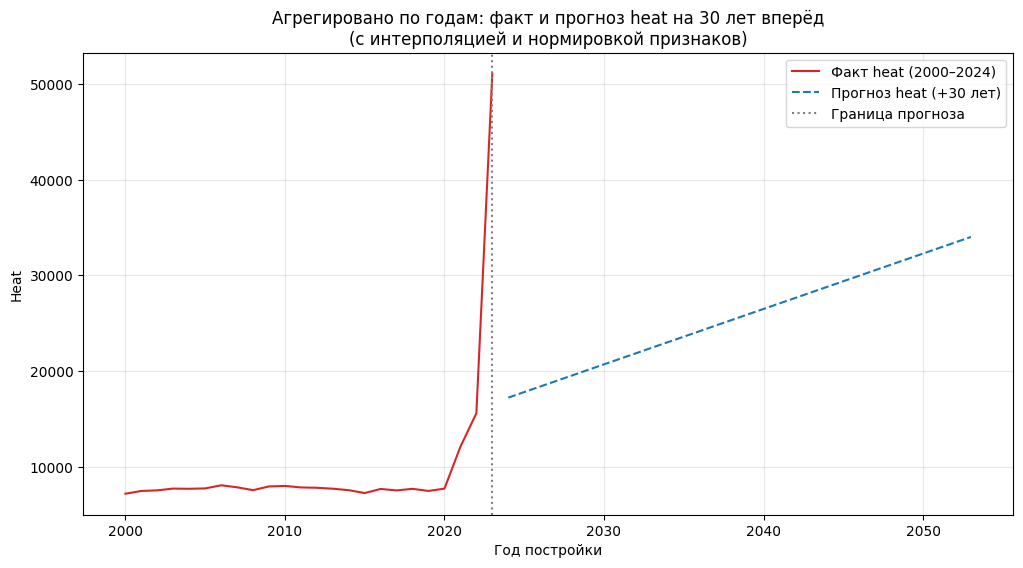

In [ ]:
#ЦФО: регрессия на нормированных данных + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 0) гарантируем числовые типы
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

# 1) агрегация по годам (2000–2024) и снятие возможных дублей лет
mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2024)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)

# на всякий случай удалим дубликаты лет (хотя groupby уже их схлопывает)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")

# 2) ставим годы индексом, интерполируем по индексу, возвращаем столбец лет
df_yearly = df_yearly.set_index("built_year")
df_yearly = df_yearly.interpolate(method="index")  # линейно по оси лет
df_yearly = df_yearly.reset_index()

# 3) нормировка признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
y = df_yearly["heat"].values

# 4) модель
reg = LinearRegression()
reg.fit(X_scaled, y)

print("Intercept:", reg.intercept_)
print("Coef area_eff_cumsum (std):", reg.coef_[0])
print("Coef climate_winter (std):", reg.coef_[1])

# 5) предсказание на истории
df_yearly["heat_pred"] = reg.predict(X_scaled)

# 6) прогноз на 30 лет вперёд
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

# линейные тренды для признаков по истории
coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area)
clim_trend = np.poly1d(coef_clim)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

# масштабируем будущее — строго в том же порядке колонок:
future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area,
                  "climate_winter": future_climate})
)

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": reg.predict(future_scaled),
    "type": "Прогноз"
})

# 7) итоговая таблица факт+прогноз (с правильной меткой type)
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"

df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# 8) график
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Агрегировано по годам: факт и прогноз heat на 30 лет вперёд\n(с интерполяцией и нормировкой признаков)")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


R2 базовой модели: 0.0073
Базовые коэффициенты: [ 17.57750877 -27.99243444] Intercept: 7663.237341269841
R2 жёсткой модели: 0.0073
Финальные коэффициенты с фиксированными знаками: [ 17.57750877 -27.99243444] Intercept: 7663.237341269841


C:\Users\Артем\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


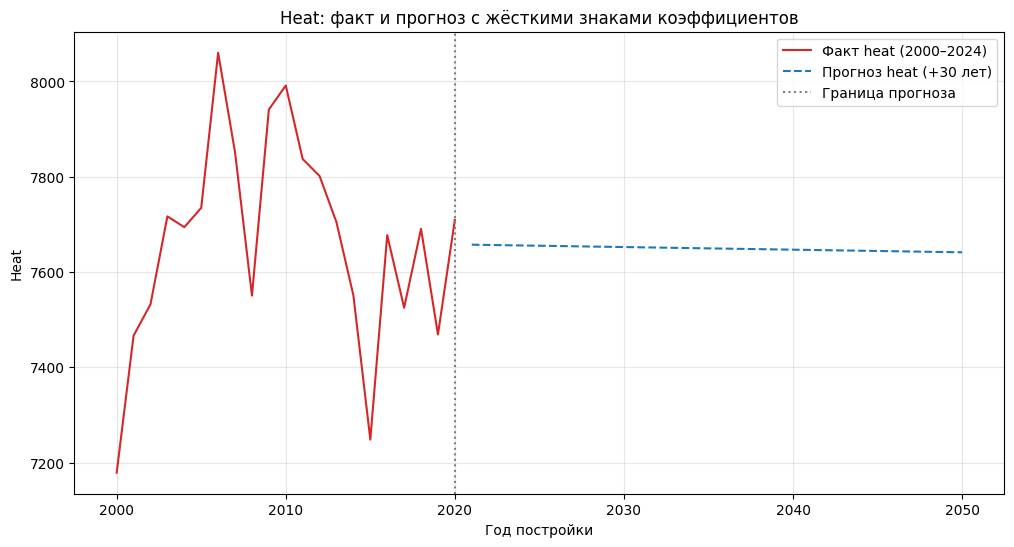

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from scipy.optimize import minimize

# ===== 0) Подготовка данных =====
for c in ["built_year", "heat", "area_eff_cumsum", "climate_winter"]:
    df_final[c] = pd.to_numeric(df_final[c], errors="coerce")

mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020)
df_yearly = (
    df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
            .groupby("built_year", as_index=False)
            .mean()
            .sort_values("built_year")
)
df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()

# ===== 1) Нормировка признаков =====
scaler = StandardScaler()
X = df_yearly[["area_eff_cumsum", "climate_winter"]].values
X_scaled = scaler.fit_transform(X)
y = df_yearly["heat"].values

# ===== 2) Базовая линейная регрессия =====
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_scaled, y)
y_pred_base = reg.predict(X_scaled)
r2_base = r2_score(y, y_pred_base)
print(f"R2 базовой модели: {r2_base:.4f}")
print("Базовые коэффициенты:", reg.coef_, "Intercept:", reg.intercept_)

# ===== 3) Жёсткое закрепление знаков =====
def mse_beta(beta, X, y):
    """Функция потерь (MSE)"""
    return np.mean((y - X @ beta) ** 2)

# Bounds: area >=0, climate <=0
bounds = [(0, None),  # area_eff_cumsum >= 0
          (None, 0)]  # climate_winter <= 0

res = minimize(mse_beta, reg.coef_, args=(X_scaled, y), bounds=bounds, method="L-BFGS-B")
beta_fixed = res.x
intercept_fixed = np.mean(y) - np.mean(X_scaled @ beta_fixed)

y_pred_fixed = intercept_fixed + X_scaled @ beta_fixed
r2_fixed = r2_score(y, y_pred_fixed)
print(f"R2 жёсткой модели: {r2_fixed:.4f}")
print("Финальные коэффициенты с фиксированными знаками:", beta_fixed, "Intercept:", intercept_fixed)

# ===== 4) Сохраняем предсказание на истории =====
df_yearly["heat_pred"] = y_pred_fixed

# ===== 5) Прогноз на 30 лет вперёд =====
last_year = int(df_yearly["built_year"].max())
future_years = np.arange(last_year + 1, last_year + 31)

coef_area_trend = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
coef_clim_trend = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
area_trend = np.poly1d(coef_area_trend)
clim_trend = np.poly1d(coef_clim_trend)

future_area = area_trend(future_years)
future_climate = clim_trend(future_years)

future_scaled = scaler.transform(
    pd.DataFrame({"area_eff_cumsum": future_area, "climate_winter": future_climate})
)
future_heat = intercept_fixed + future_scaled @ beta_fixed

future_data = pd.DataFrame({
    "built_year": future_years,
    "area_eff_cumsum": future_area,
    "climate_winter": future_climate,
    "heat": future_heat,
    "type": "Прогноз"
})

# ===== 6) Объединяем факт и прогноз =====
df_hist = df_yearly[["built_year", "heat"]].copy()
df_hist["type"] = "Факт"
df_all = pd.concat([df_hist, future_data[["built_year", "heat", "type"]]],
                   ignore_index=True).sort_values("built_year")

# ===== 7) График =====
plt.figure(figsize=(12,6))
hist = df_all[df_all["type"] == "Факт"]
fut  = df_all[df_all["type"] == "Прогноз"]

plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
plt.title("Heat: факт и прогноз с жёсткими знаками коэффициентов")
plt.xlabel("Год постройки")
plt.ylabel("Heat")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


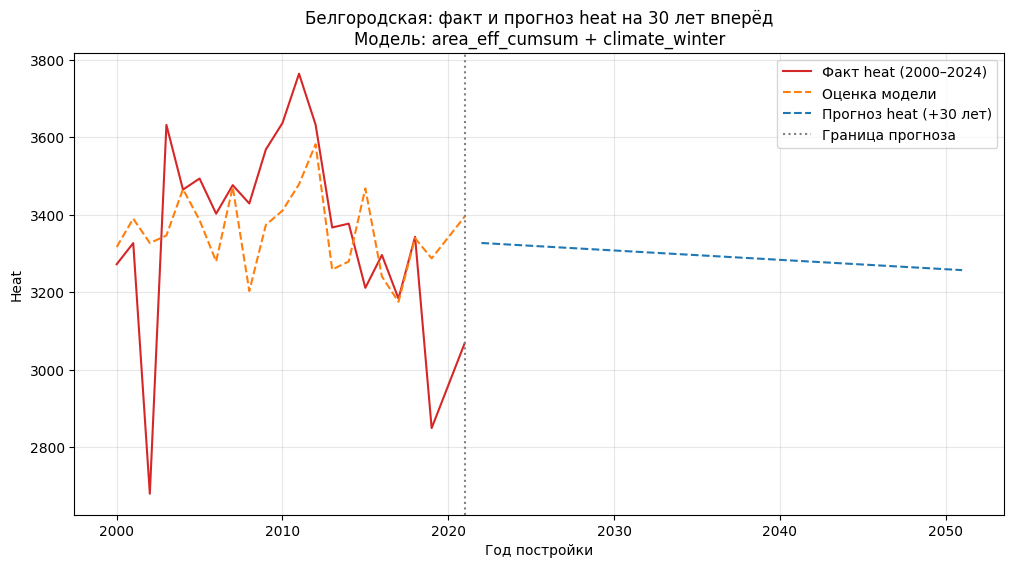

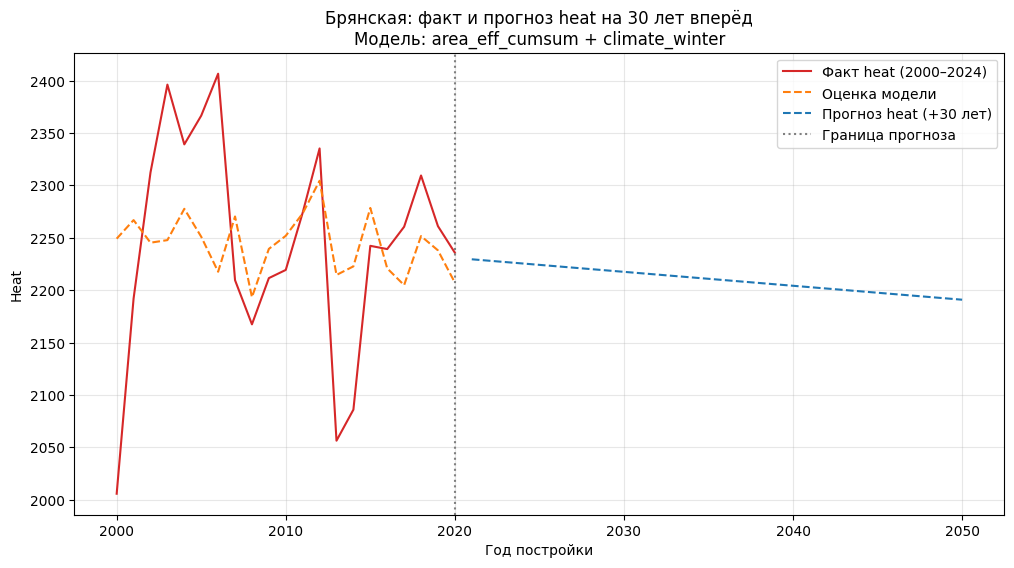

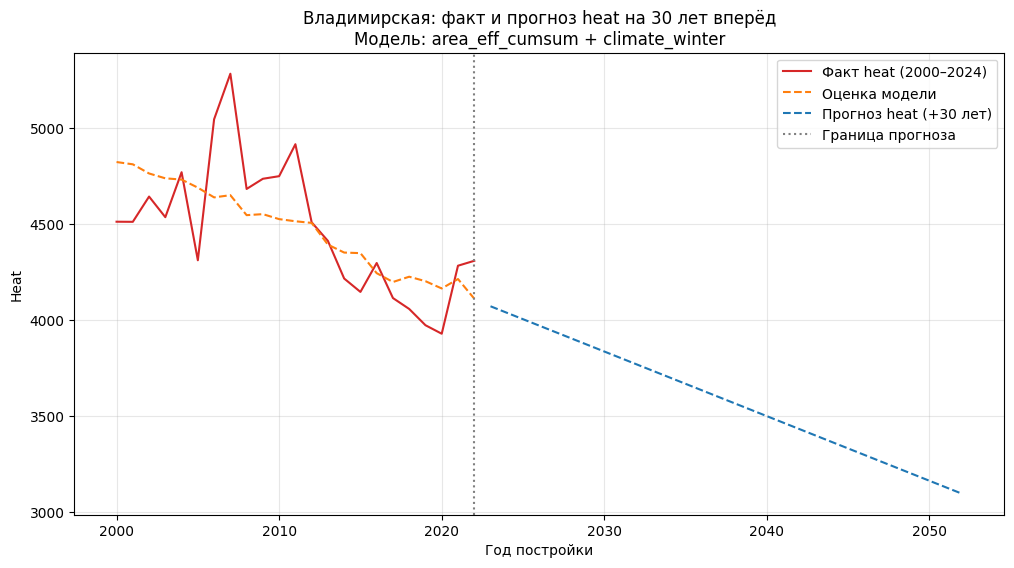

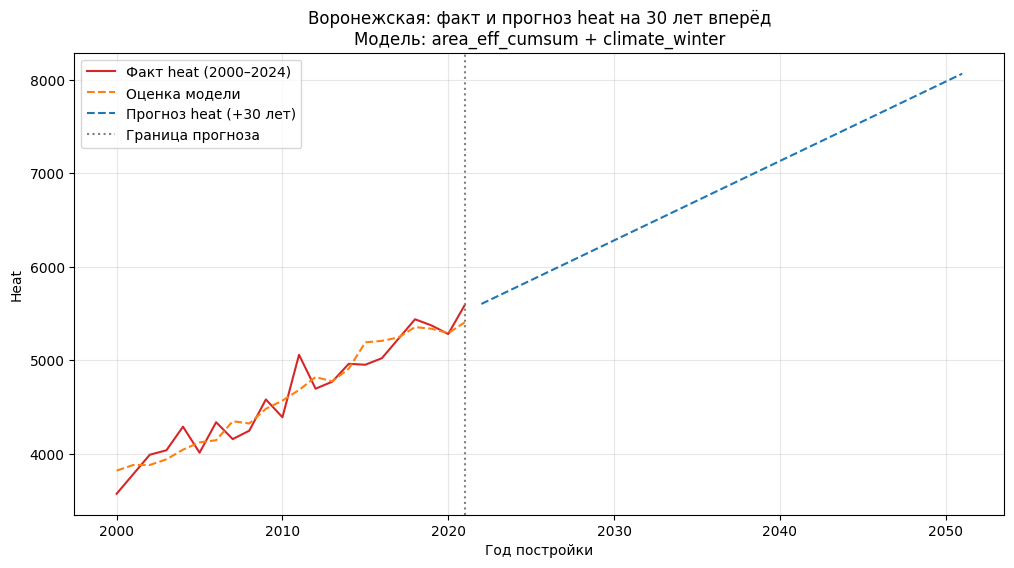

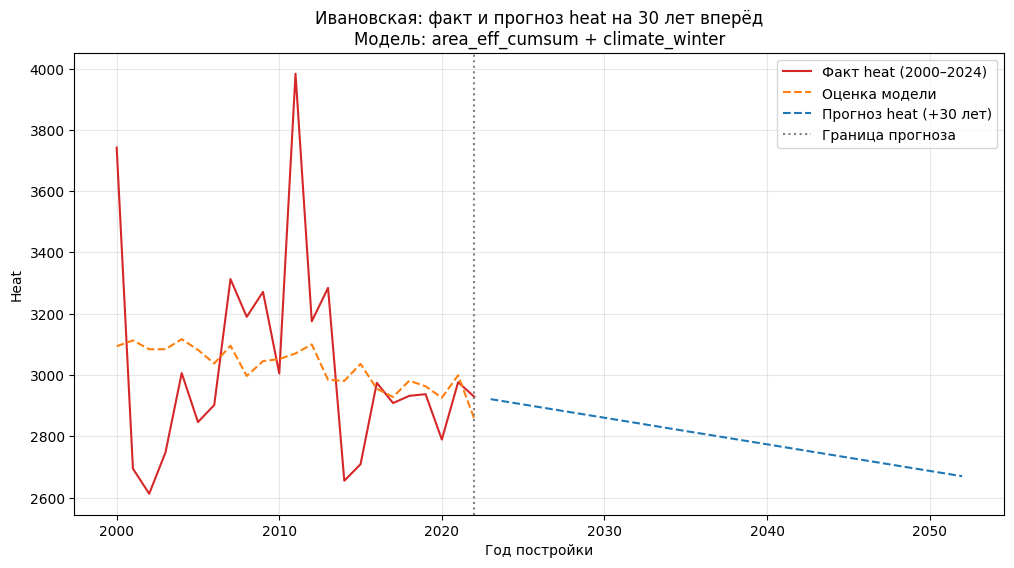

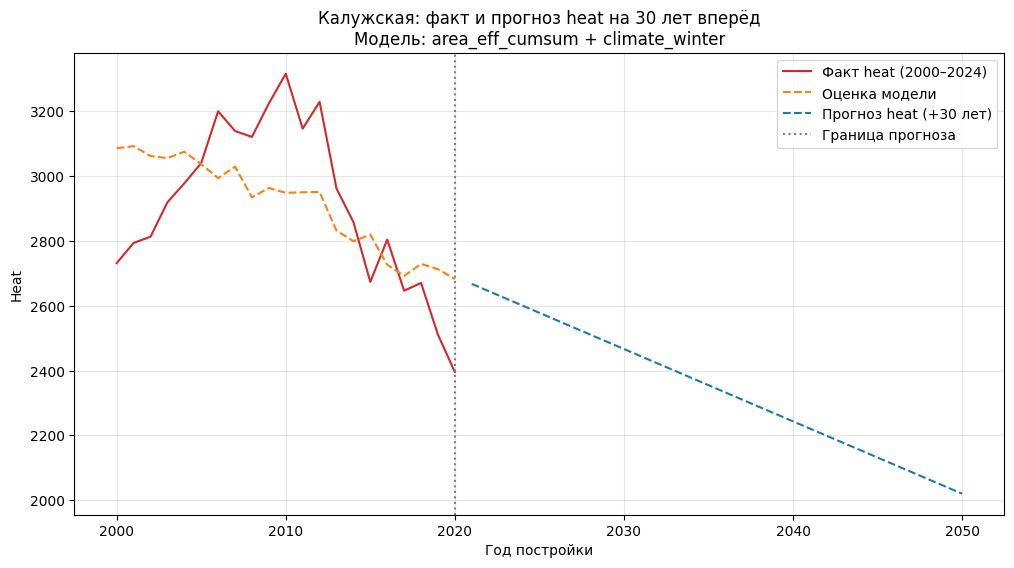

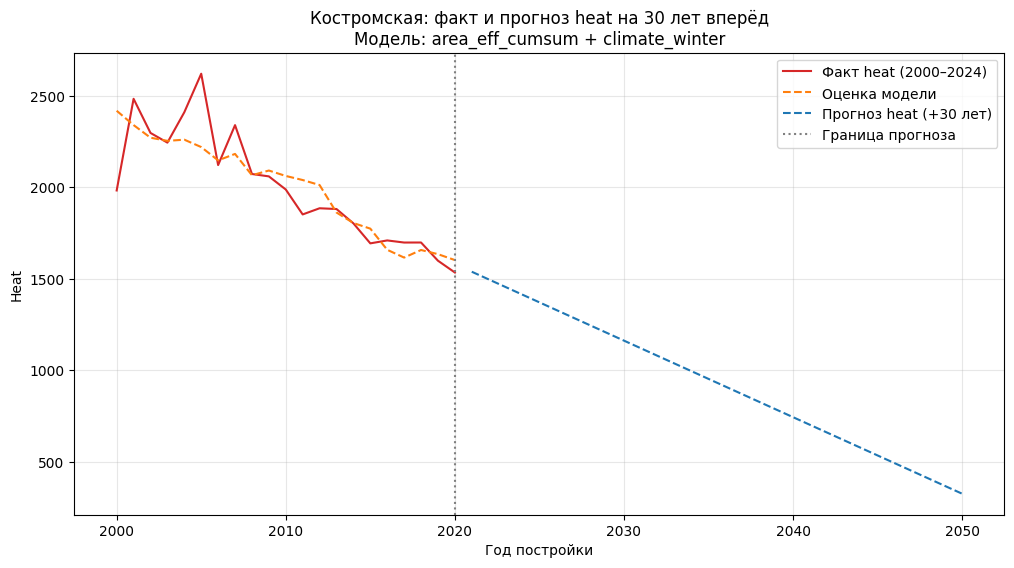

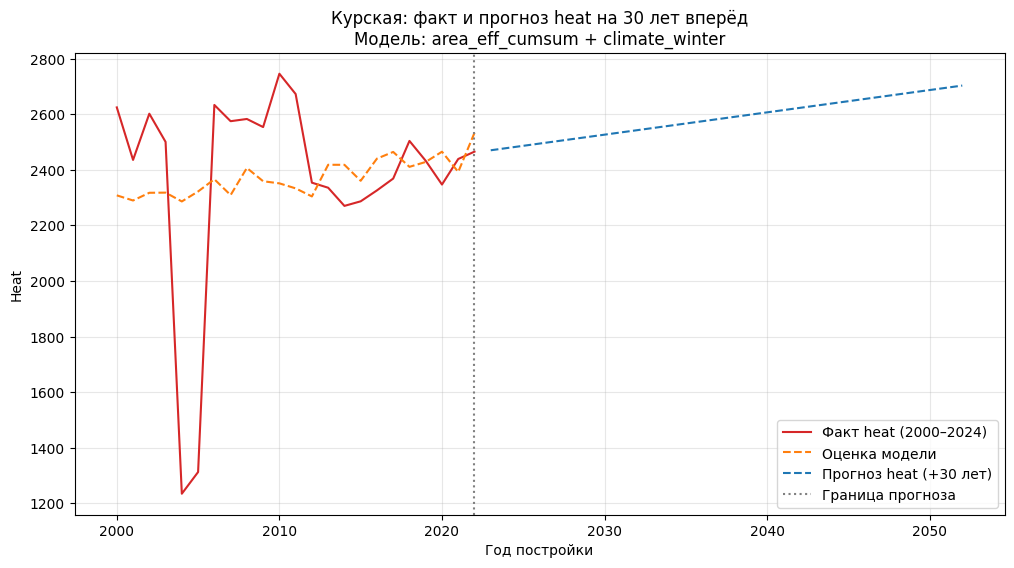

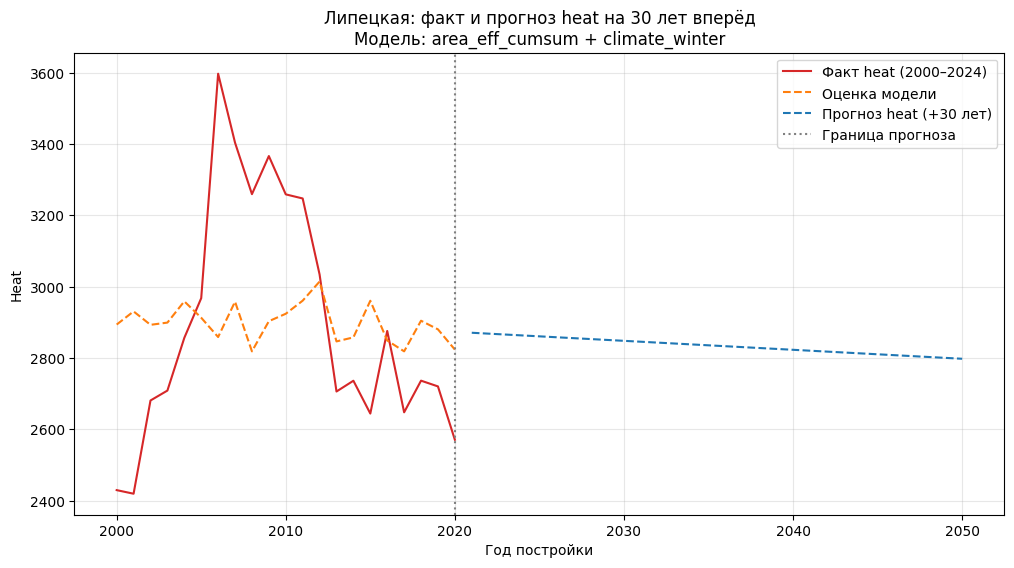

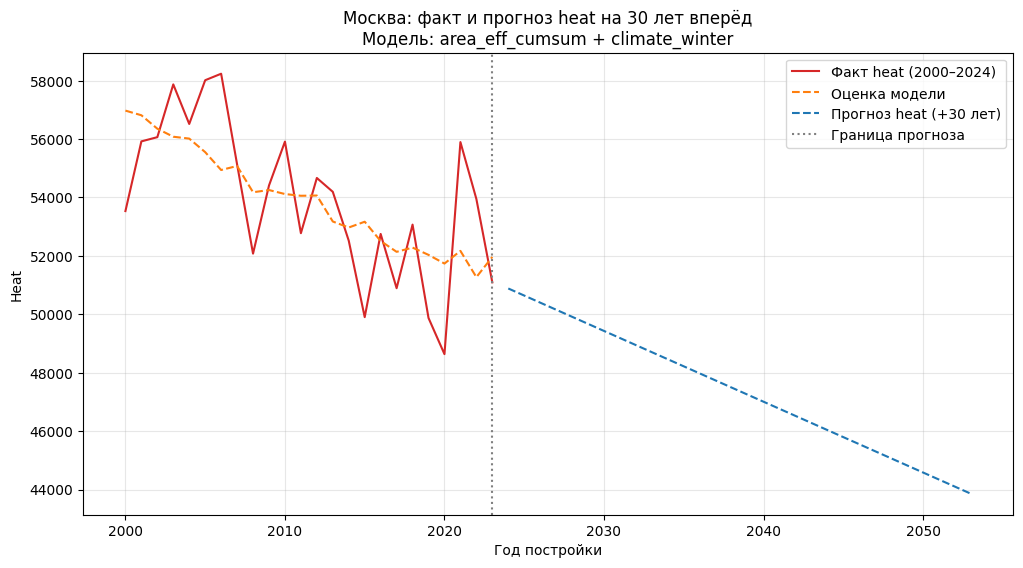

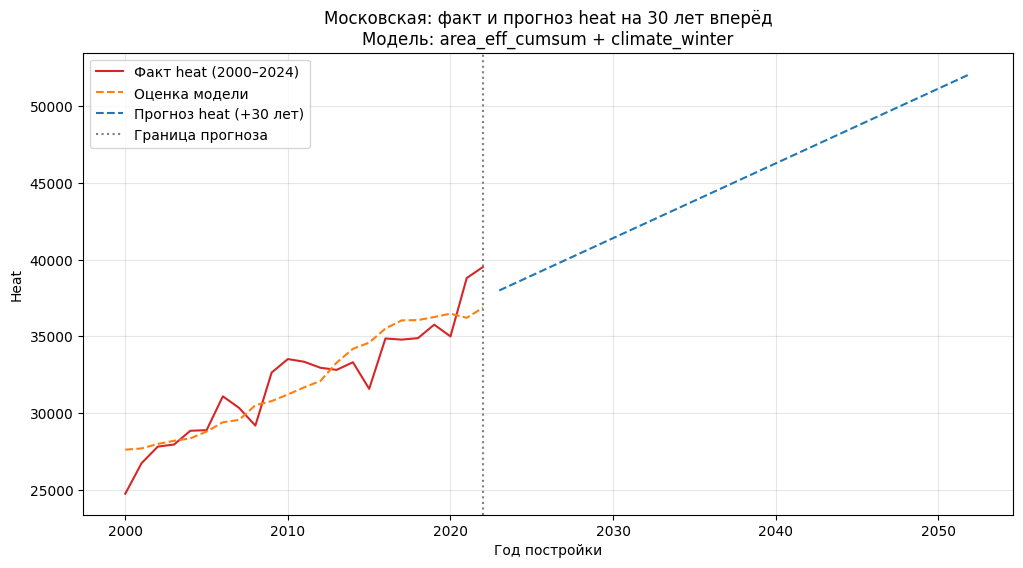

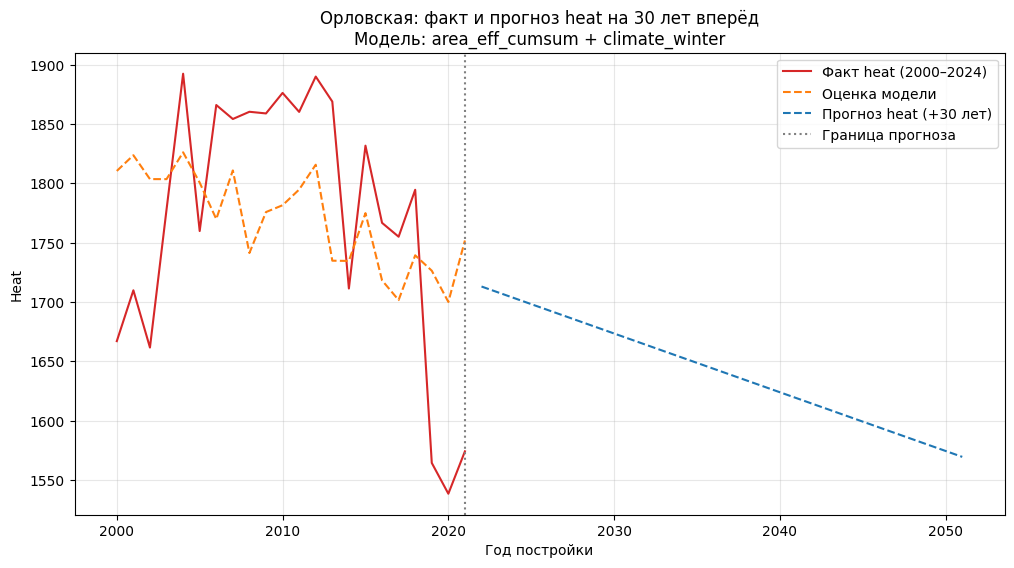

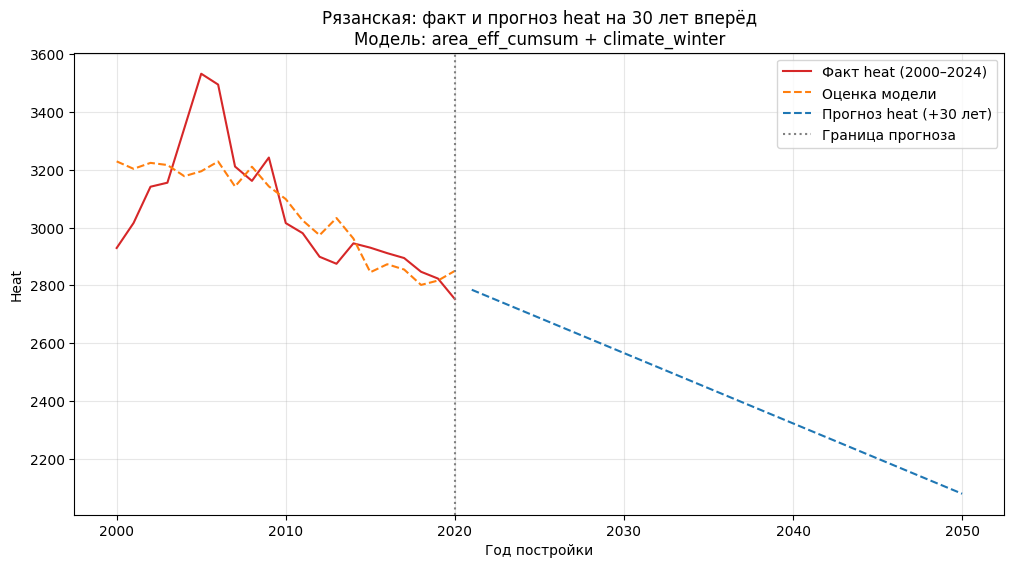

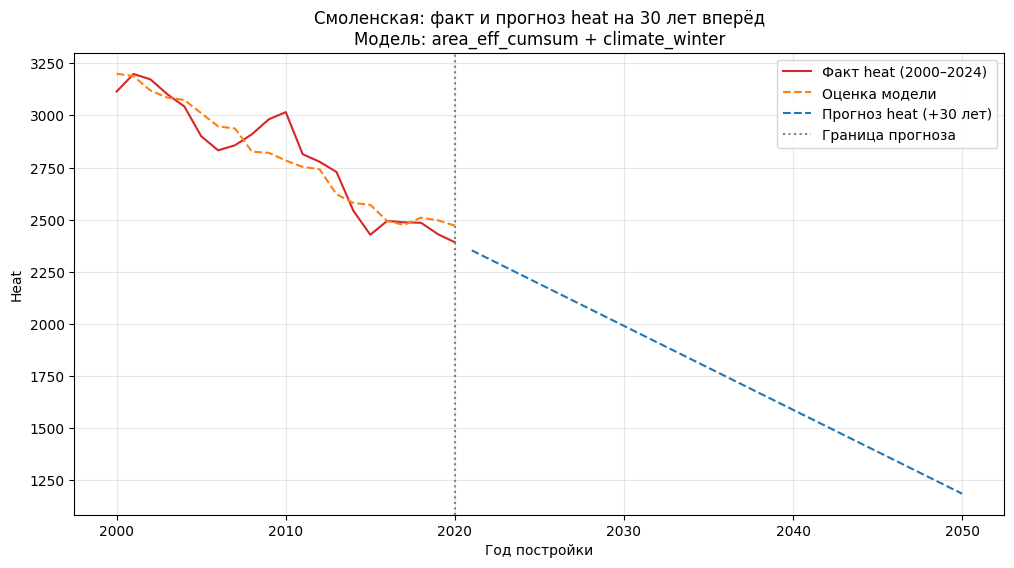

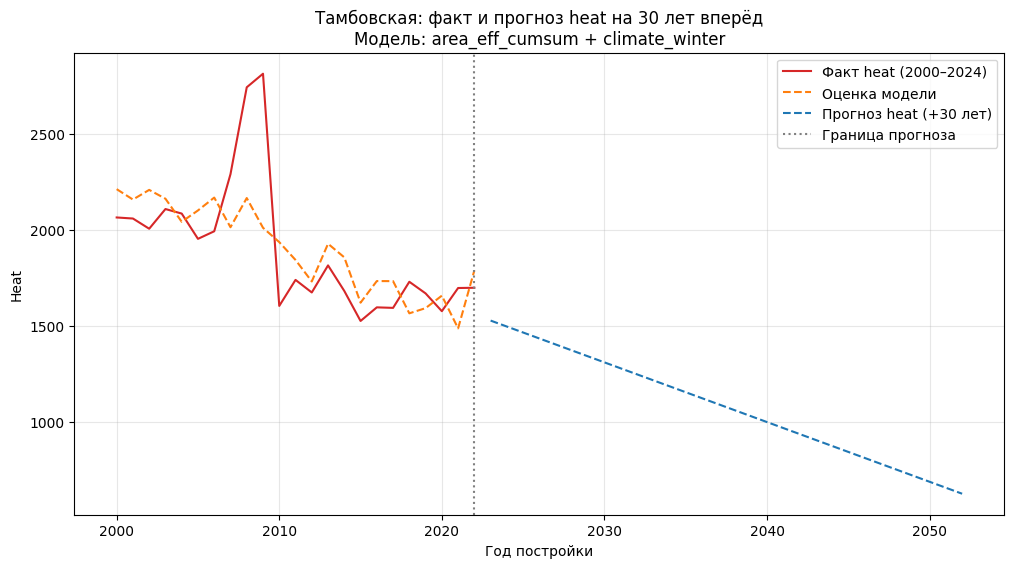

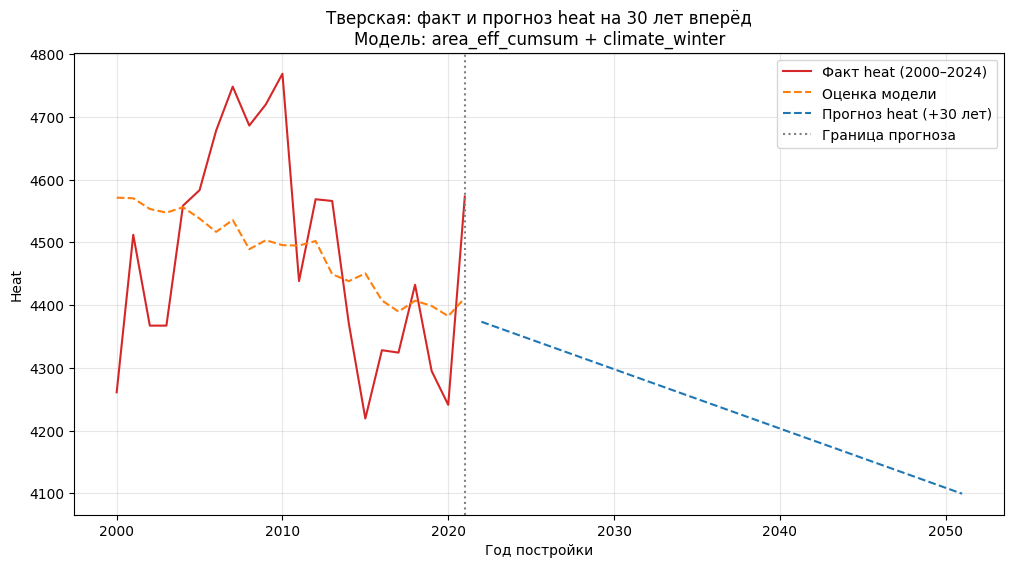

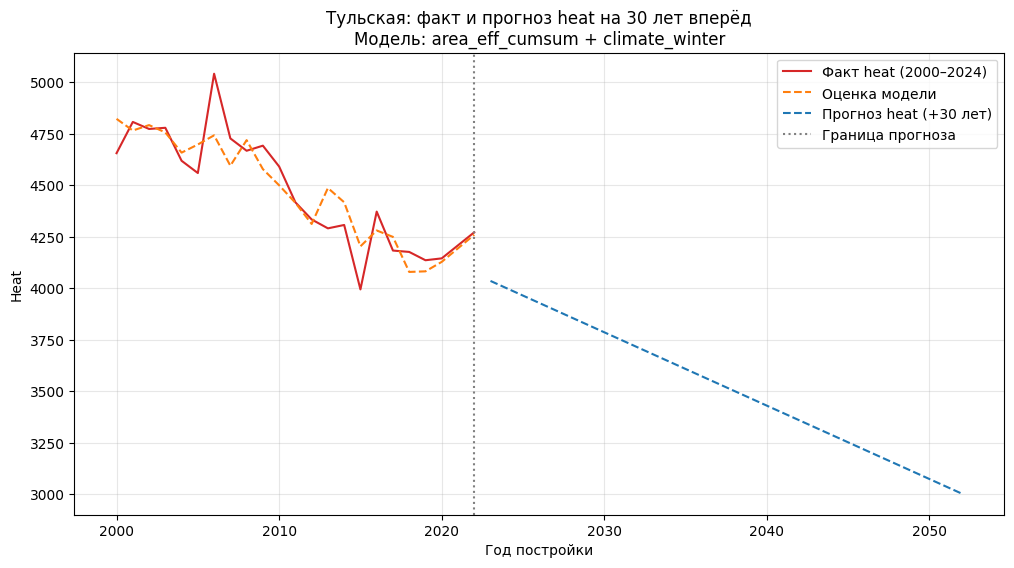

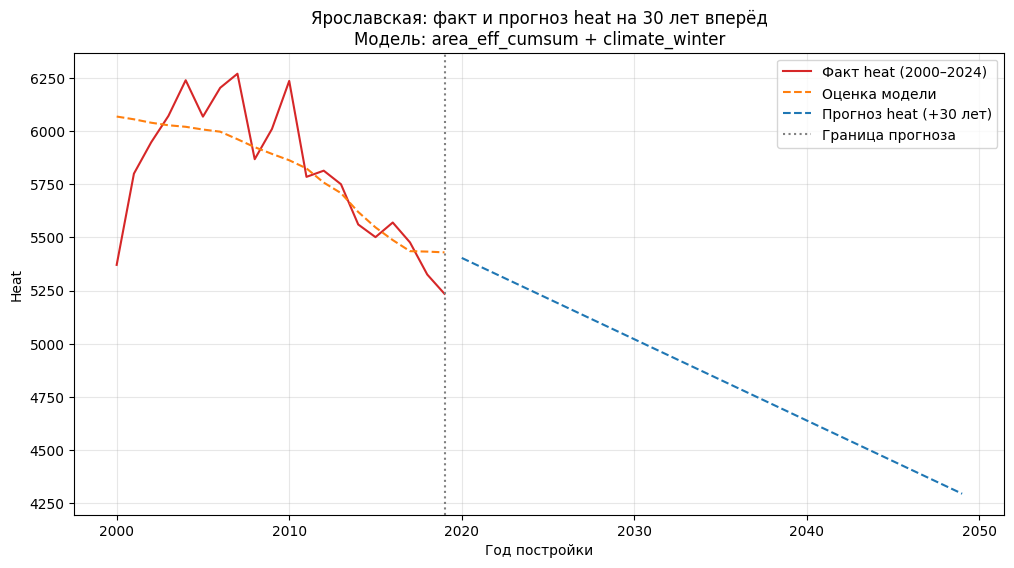

          Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0   Белгородская    395.573284              0.000047          -291.977482   
1       Брянская   1436.889725              0.000016           -81.515556   
2   Владимирская   8130.280671             -0.000160           -67.150017   
3    Воронежская   -791.867868              0.000133          -145.656573   
4     Ивановская   2866.799855             -0.000024           -97.808803   
5      Калужская   4085.329193             -0.000085           -79.070029   
6    Костромская   7112.767806             -0.000558           -83.240930   
7        Курская   2899.002361              0.000007            97.008222   
8       Липецкая   1385.538622              0.000031          -150.735726   
9         Москва  67601.393167             -0.000063          -616.480224   
10    Московская  16401.111757              0.000100           440.669728   
11     Орловская   1403.963209             -0.000006           -69.205826   

In [ ]:
#ЦФО по регионам: регрессия обычная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

regions = df_final["formalname_region"].unique()

results = []  # сюда будем складывать коэффициенты регрессии

for region in regions:
    mask = (
        (df_final["built_year"] >= 2000)
        & (df_final["built_year"] <= 2024)
        & (df_final["formalname_region"] == region)
    )
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
        .groupby("built_year", as_index=False)
        .mean()
    )
    
    if df_yearly.empty:
        continue  # если по региону нет данных, пропускаем

    # интерполяция
    df_yearly[["heat", "area_eff_cumsum", "climate_winter"]] = (
        df_yearly[["heat", "area_eff_cumsum", "climate_winter"]]
        .interpolate(method="linear")
    )

    # регрессия
    X = df_yearly[["area_eff_cumsum", "climate_winter"]]
    y = df_yearly["heat"]
    reg = LinearRegression()
    reg.fit(X, y)

    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2": reg.score(X, y)  # качество на истории
    })

    # прогноз на 30 лет
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_data = pd.DataFrame({
        "built_year": future_years,
        "area_eff_cumsum": future_area,
        "climate_winter": future_climate
    })
    future_data["heat_pred"] = reg.predict(future_data[["area_eff_cumsum", "climate_winter"]])

    # прогноз и история
    df_yearly["heat_pred"] = reg.predict(df_yearly[["area_eff_cumsum", "climate_winter"]])

    df_all = pd.concat(
        [
            df_yearly.assign(type="Факт"),
            future_data.rename(columns={"heat_pred": "heat"}).assign(type="Прогноз")
        ],
        ignore_index=True
    )

    # график
    plt.figure(figsize=(12,6))
    hist = df_all[df_all["type"] == "Факт"]
    fut = df_all[df_all["type"] == "Прогноз"]

    plt.plot(hist["built_year"], hist["heat"], label="Факт heat (2000–2024)", color="tab:red")
    plt.plot(hist["built_year"], hist["heat_pred"], label="Оценка модели", color="tab:orange", linestyle="--")
    plt.plot(fut["built_year"], fut["heat"], label="Прогноз heat (+30 лет)", color="tab:blue", linestyle="--")

    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\nМодель: area_eff_cumsum + climate_winter")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# Собираем все коэффициенты в таблицу
df_results = pd.DataFrame(results)

# выводим
print(df_results)

# можно сохранить в Excel
#df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)


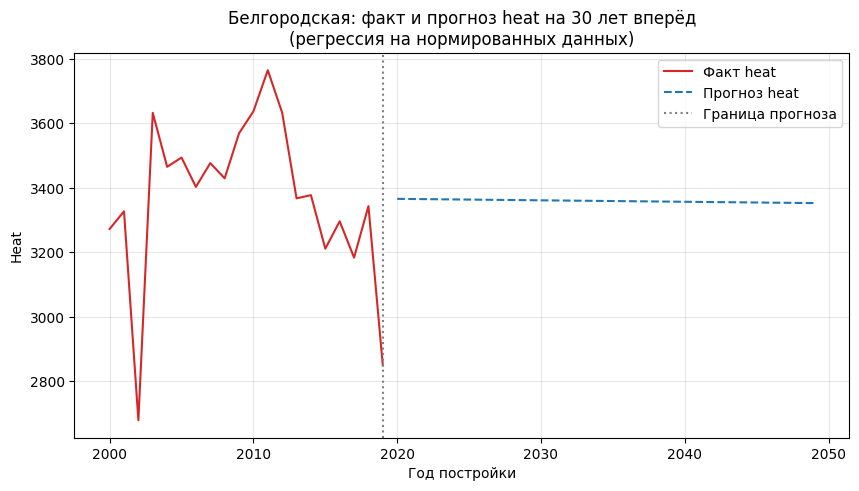

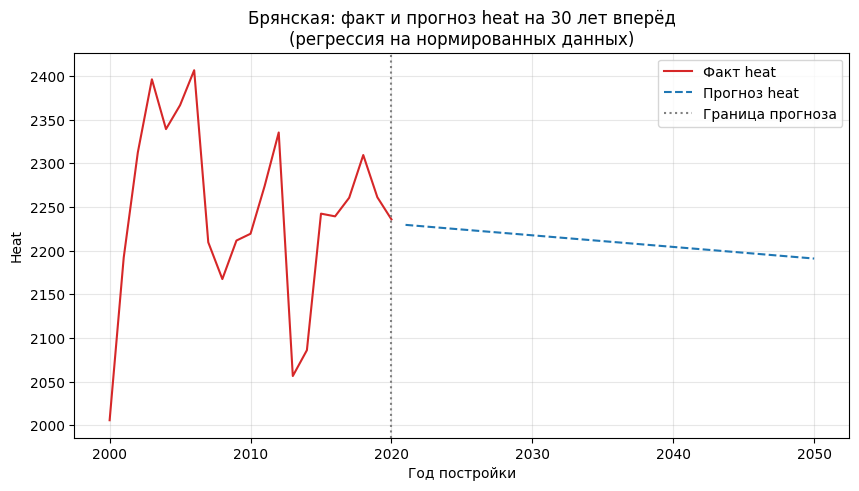

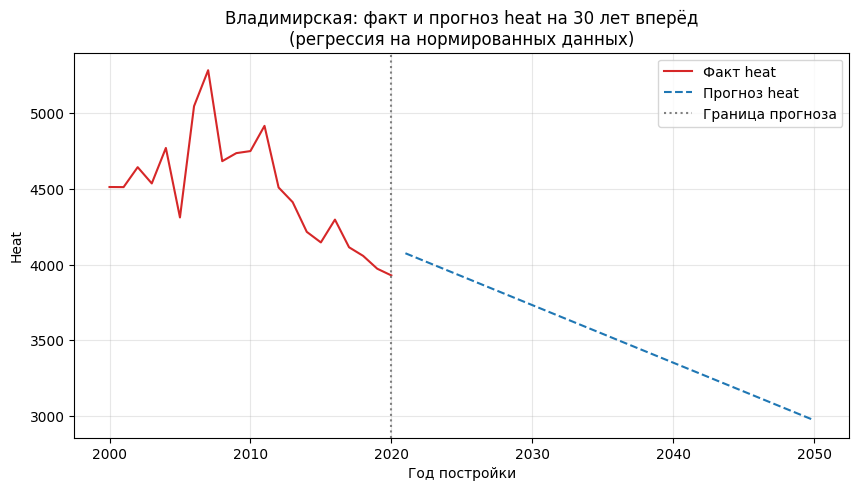

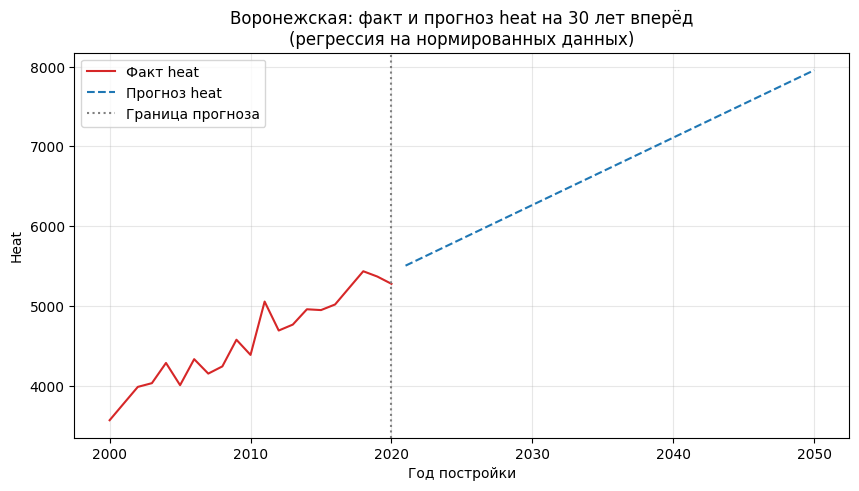

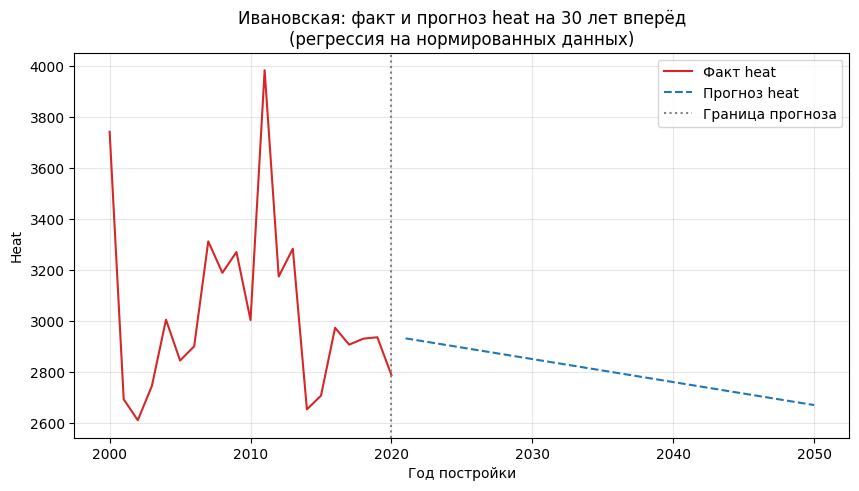

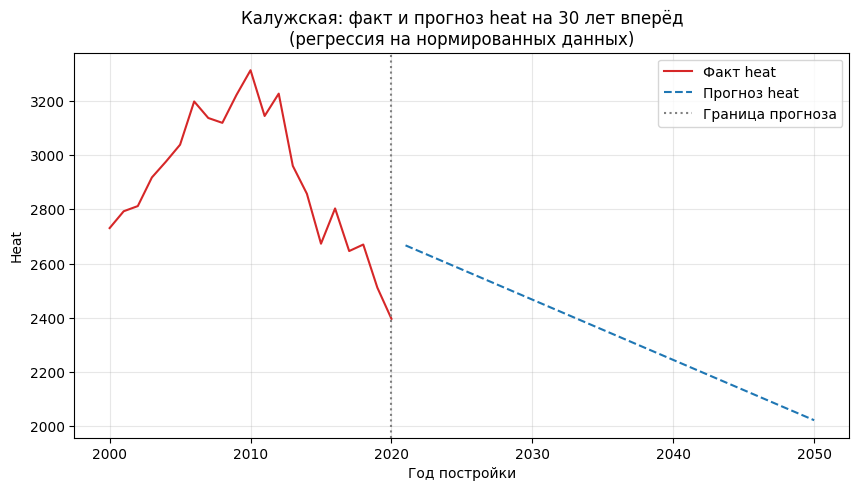

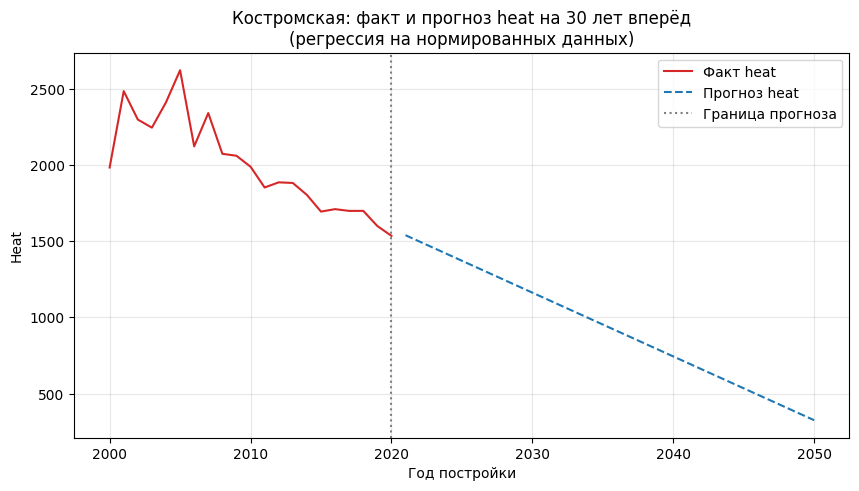

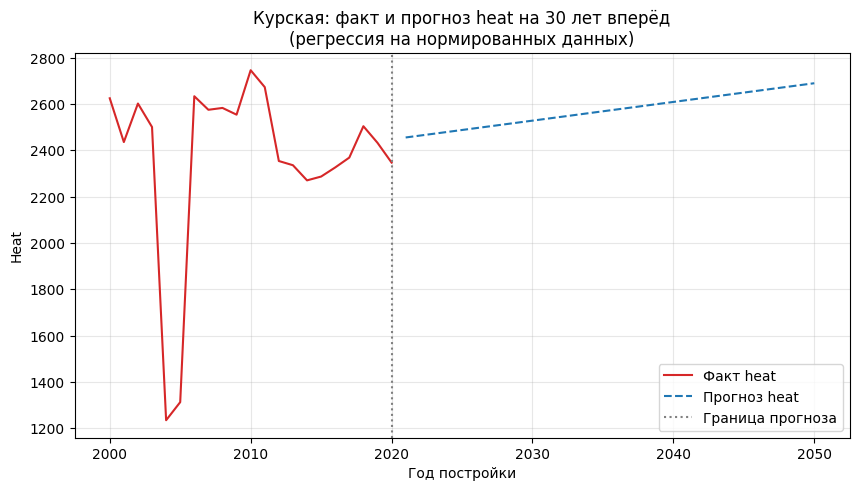

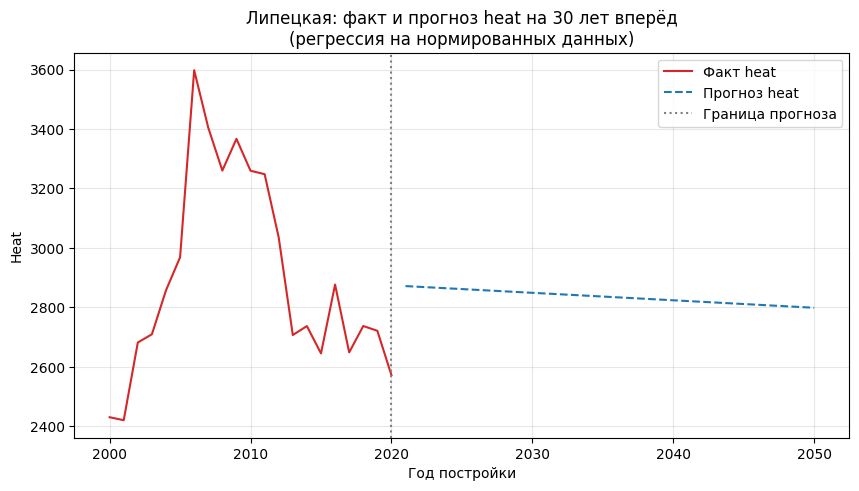

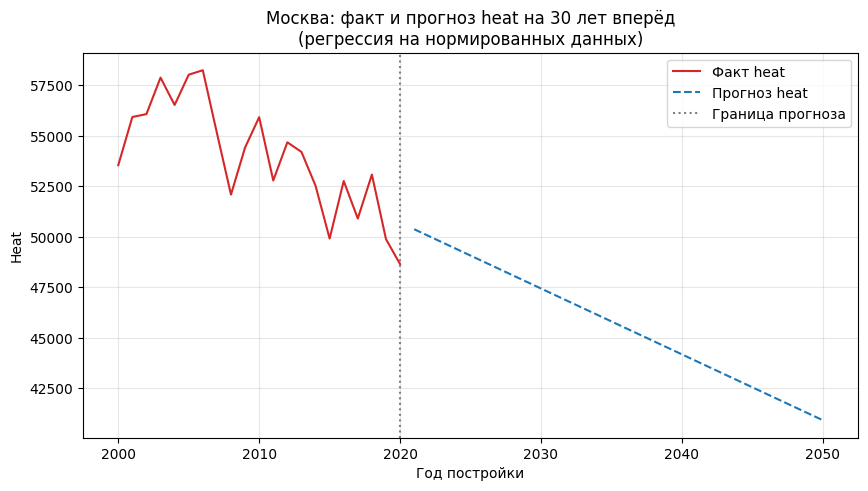

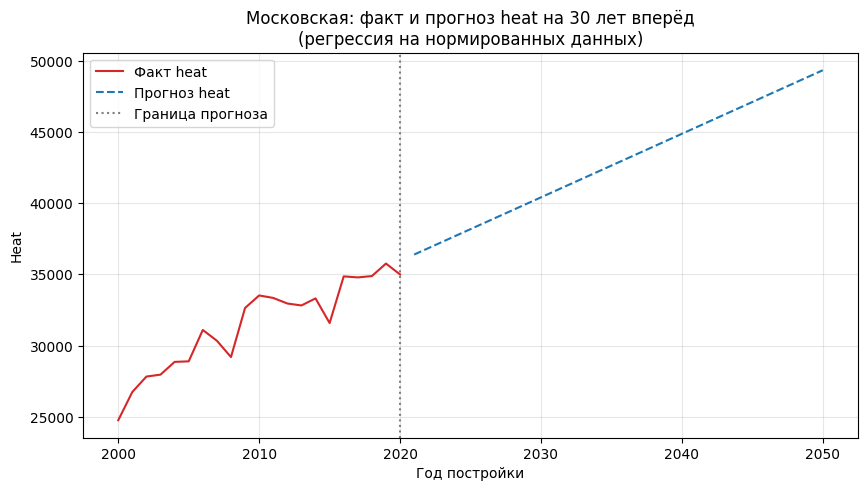

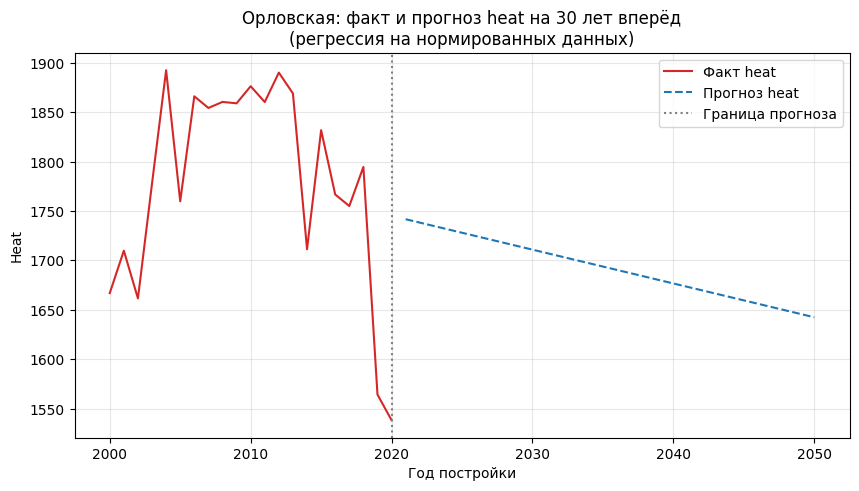

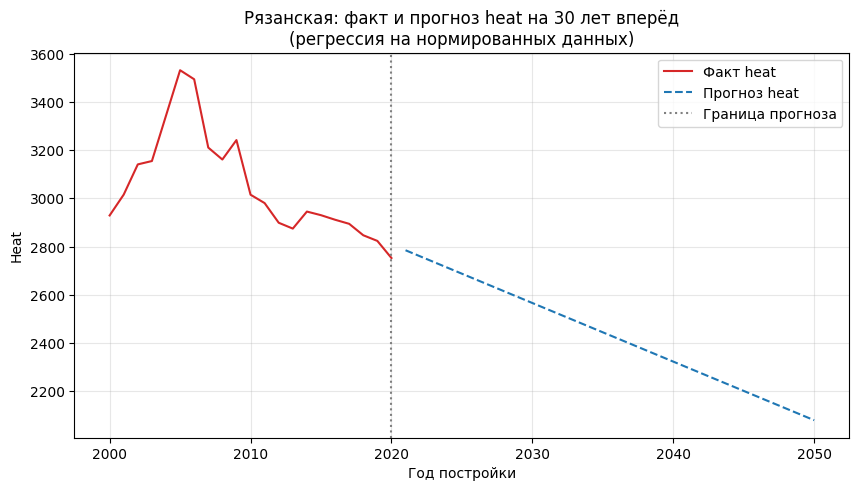

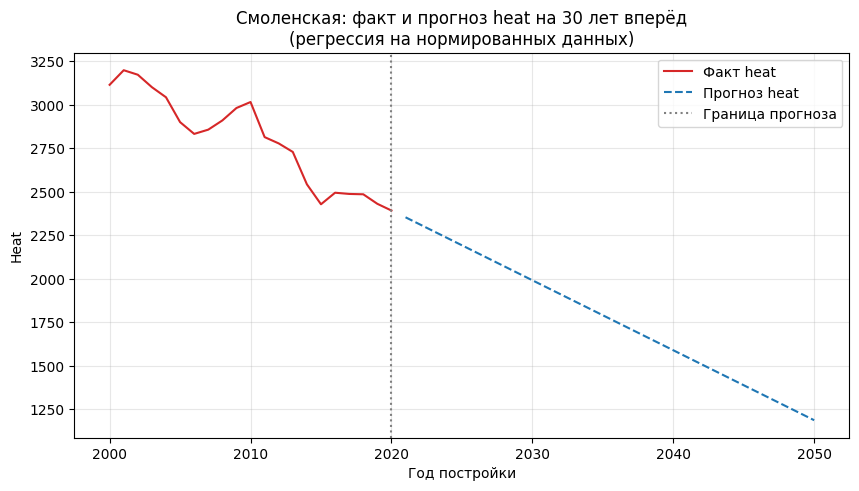

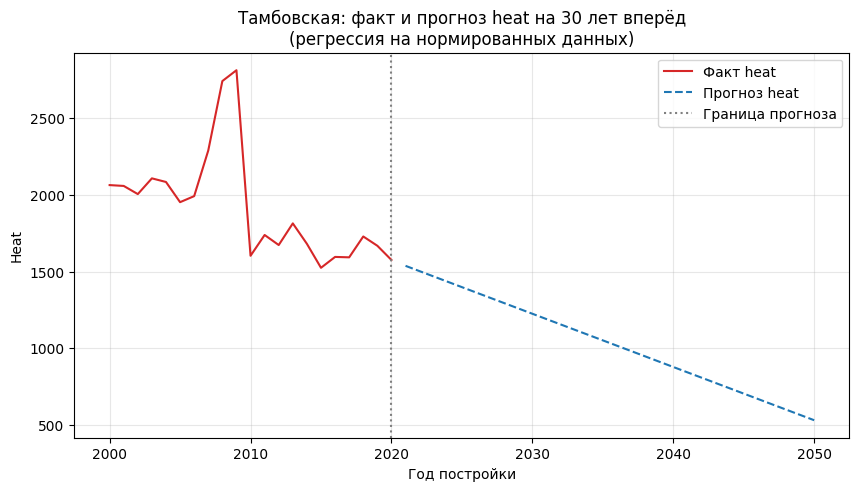

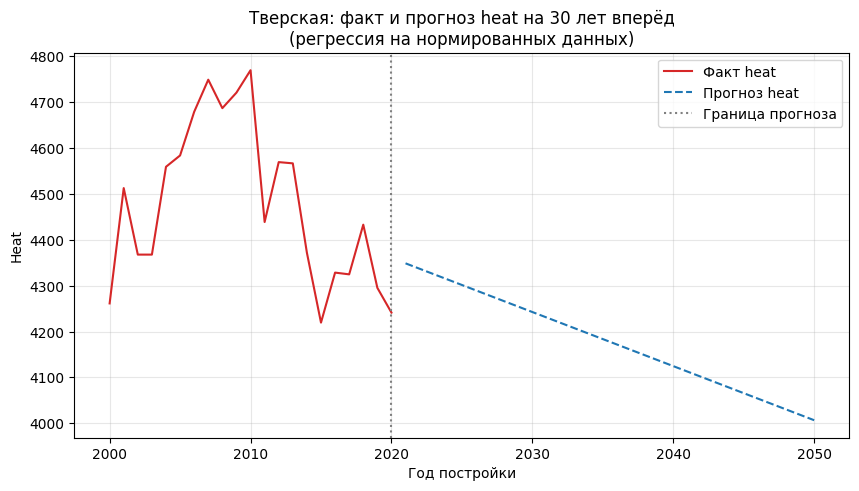

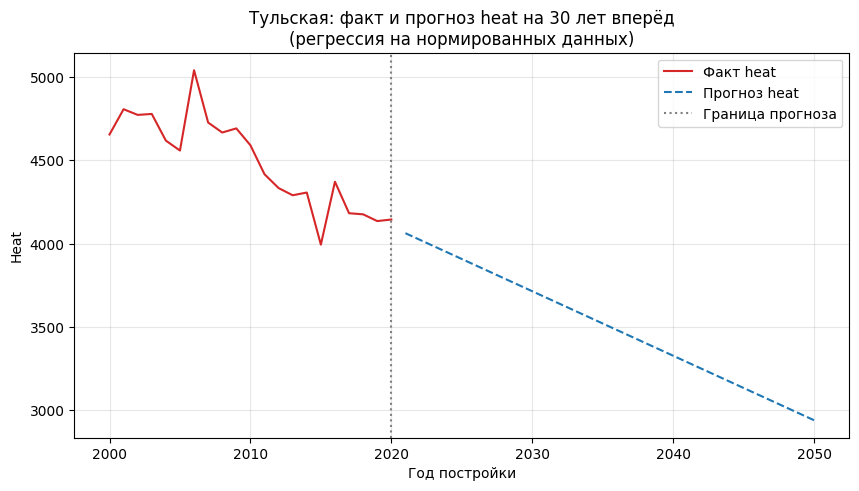

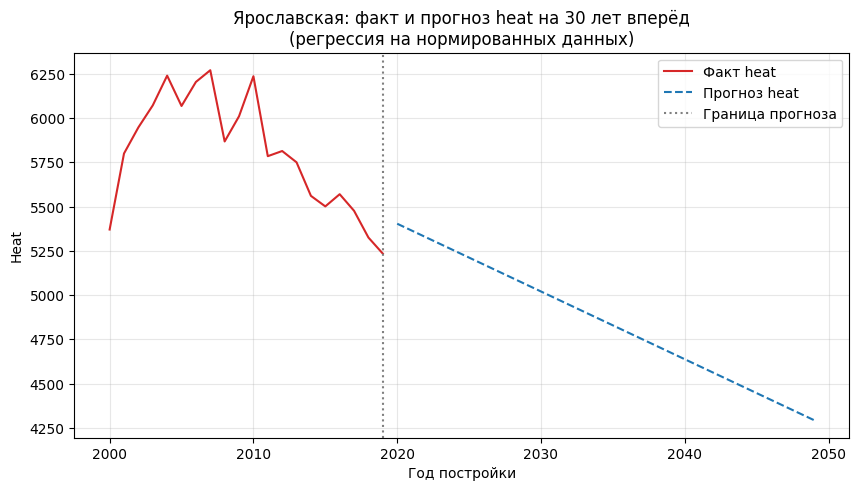

          Регион     Intercept  Coef_area_eff_cumsum  Coef_climate_winter  \
0   Белгородская   3370.209500            104.161730          -149.365359   
1       Брянская   2244.080000             22.335655           -40.377259   
2   Владимирская   4494.032381           -179.265051           -69.687435   
3    Воронежская   4577.531429            556.078577           -54.813001   
4     Ивановская   3032.322857             -5.281444           -66.488998   
5      Калужская   2912.494762           -108.004509           -39.165912   
6    Костромская   1999.105238           -225.650669           -41.231892   
7        Курская   2366.809524             -0.714767            66.815562   
8       Липецкая   2898.496667             40.406230           -74.664221   
9         Москва  53948.677143          -1545.797221          -588.718800   
10    Московская  31479.709524           2823.429894          -117.233035   
11     Орловская   1779.418095             16.620319           -50.180599   

In [ ]:
#ЦФО по регионам: регрессия нормированная + прогноз на 30 лет вперёд

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

regions = df_final["formalname_region"].unique()

results = []  # сюда сложим коэффициенты регрессий

for region in regions:
    # 1) фильтр по региону и годам
    mask = (df_final["built_year"] >= 2000) & (df_final["built_year"] <= 2020) & \
           (df_final["formalname_region"] == region)
    
    df_yearly = (
        df_final.loc[mask, ["built_year", "heat", "area_eff_cumsum", "climate_winter"]]
                .groupby("built_year", as_index=False)
                .mean()
                .sort_values("built_year")
    )
    
    if df_yearly.empty:
        continue  # пропускаем регионы без данных
    
    df_yearly = df_yearly.drop_duplicates(subset=["built_year"], keep="first")
    df_yearly = df_yearly.set_index("built_year").interpolate(method="index").reset_index()
    
    # 2) нормировка признаков
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_yearly[["area_eff_cumsum", "climate_winter"]])
    y = df_yearly["heat"].values
    
    # 3) регрессия
    reg = LinearRegression()
    reg.fit(X_scaled, y)
    
    # сохраняем коэффициенты
    results.append({
        "Регион": region,
        "Intercept": reg.intercept_,
        "Coef_area_eff_cumsum": reg.coef_[0],
        "Coef_climate_winter": reg.coef_[1],
        "R2 (на истории)": reg.score(X_scaled, y)
    })
    
    # 4) прогноз на 30 лет вперёд
    last_year = int(df_yearly["built_year"].max())
    future_years = np.arange(last_year + 1, last_year + 31)

    coef_area = np.polyfit(df_yearly["built_year"], df_yearly["area_eff_cumsum"], 1)
    coef_clim = np.polyfit(df_yearly["built_year"], df_yearly["climate_winter"], 1)
    area_trend = np.poly1d(coef_area)
    clim_trend = np.poly1d(coef_clim)

    future_area = area_trend(future_years)
    future_climate = clim_trend(future_years)

    future_scaled = scaler.transform(
        pd.DataFrame({"area_eff_cumsum": future_area,
                      "climate_winter": future_climate})
    )
    
    future_data = pd.DataFrame({
        "built_year": future_years,
        "heat": reg.predict(future_scaled),
        "type": "Прогноз"
    })

    # 5) история
    df_hist = df_yearly[["built_year", "heat"]].copy()
    df_hist["type"] = "Факт"
    
    df_all = pd.concat([df_hist, future_data], ignore_index=True).sort_values("built_year")
    
    # 6) график
    plt.figure(figsize=(10,5))
    hist = df_all[df_all["type"] == "Факт"]
    fut  = df_all[df_all["type"] == "Прогноз"]
    
    plt.plot(hist["built_year"], hist["heat"], label="Факт heat", color="tab:red")
    plt.plot(fut["built_year"],  fut["heat"],  label="Прогноз heat", color="tab:blue", linestyle="--")
    
    plt.axvline(x=last_year, color="gray", linestyle=":", label="Граница прогноза")
    plt.title(f"{region}: факт и прогноз heat на 30 лет вперёд\n(регрессия на нормированных данных)")
    plt.xlabel("Год постройки")
    plt.ylabel("Heat")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

# 7) таблица коэффициентов
df_results = pd.DataFrame(results)
print(df_results)

# можно сохранить в Excel:
# df_results.to_excel("regression_coeffs_by_region.xlsx", index=False)
